In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import seaborn as sns
from textwrap import fill
from synergy_dataset import Dataset, iter_datasets
from buscarpy import calculate_h0
from fastlite import *
from fastcore.utils import *
from fastcore.net import urlsave
import pyarrow as pa
import pyarrow.parquet as pq
import pyarrow.compute as pc

## Get the latest data from the HPC

In [2]:
%%sh
bash sync.sh

In [3]:
# r = 'Appenzeller-Herzog_2019'
# table = pq.read_table(
#     '/p/tmp/maxcall/ml-screening/llm_preds', 
#     filters=[('review', '=', 'Appenzeller-Herzog_2019')]
# )

In [4]:
r = 'Appenzeller-Herzog_2019'
table = pq.read_table(
    'output_data/llm_preds', 
    #filters=[('review', '=', 'Appenzeller-Herzog_2019')]
    #filters=[('model'
)
table#.to_pandas().tail()#.py.unique()

pyarrow.Table
y: int64
py: float
pn: float
openalex_id: string
review: dictionary<values=string, indices=int32, ordered=0>
model: dictionary<values=string, indices=int32, ordered=0>
----
y: [[0,0,0,0,0,...,0,0,0,0,0],[0,0,0,0,0,...,0,0,0,0,0],...,[0,0,0,0,0,...,0,0,0,0,0],[0,0,0,0,0,...,0,0,0,0,0]]
py: [[0.011279272,0.016355524,0.00039178695,0.012771004,0.014694257,...,0.99484384,0.5637434,0.2374999,0.0010477802,0.9939924],[0.3167244,0.19452949,0.9994811,0.037882365,0.051273156,...,0.97475344,0.9993343,0.96132725,0.9817895,0.9266881],...,[0.00038550788,0.20232292,0.00018051027,0.26684082,0.0023145685,...,0.15796663,0.20464091,0.16173337,0.049100243,0.0020847332],[0.020968994,0.9464195,0.078493305,0.7958663,0.052521218,...,0.8104605,0.52073604,0.21354496,0.5061242,0.6809987]]
pn: [[0.98303026,0.9795675,0.9977504,0.9815769,0.9817901,...,0.0006541192,0.43223393,0.7541071,0.99594384,0.000031846645],[0.505926,0.6681526,0.000003871071,0.9175042,0.8804684,...,0.0018515787,0.0000016777775,0.02

/tmp/ipykernel_257430/3344801566.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


0       0
1       0
2       0
3       0
4       0
       ..
7875    0
7876    0
7877    0
7878    0
7879    0
Name: y, Length: 7880, dtype: int64

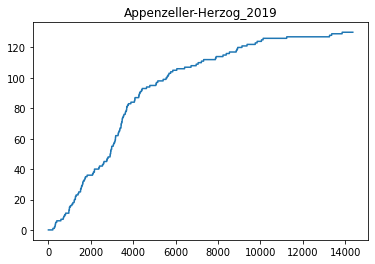

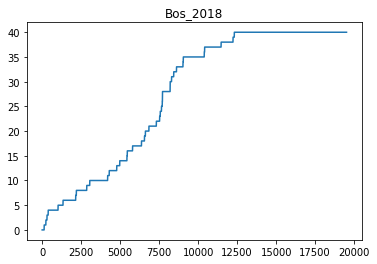

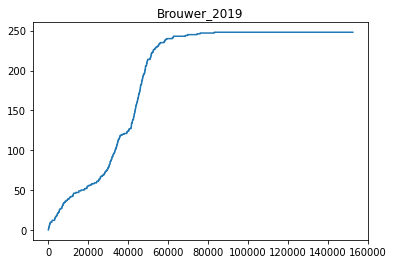

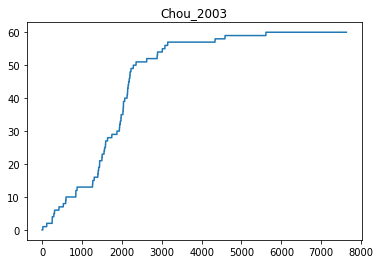

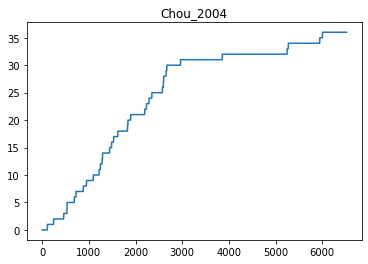

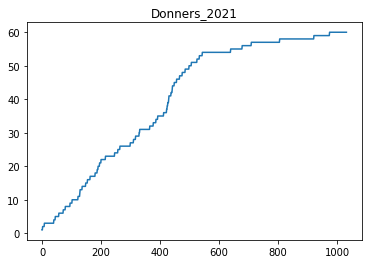

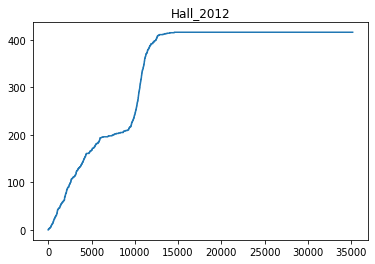

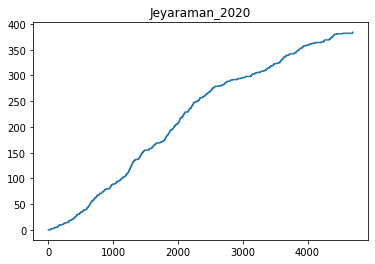

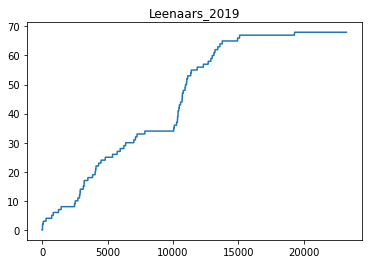

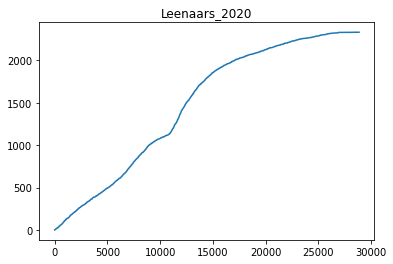

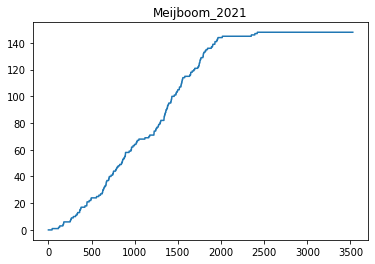

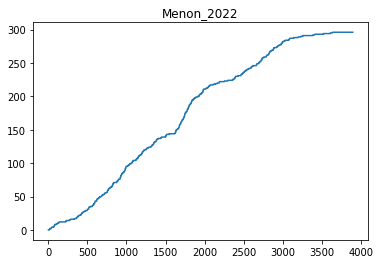

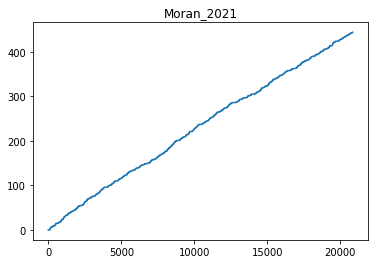

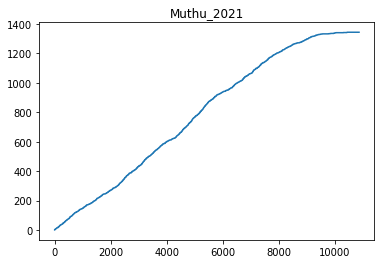

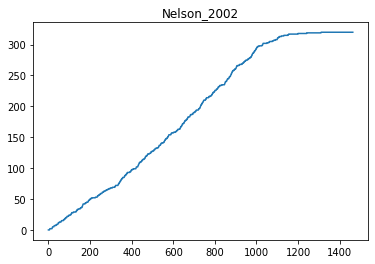

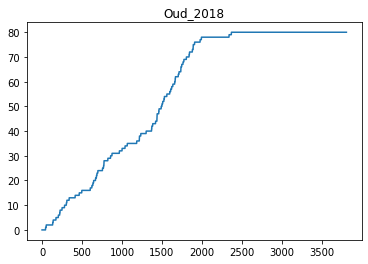

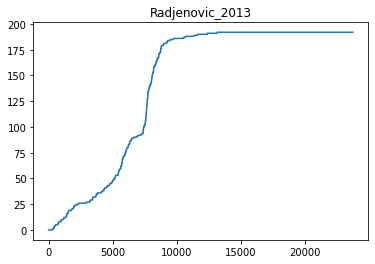

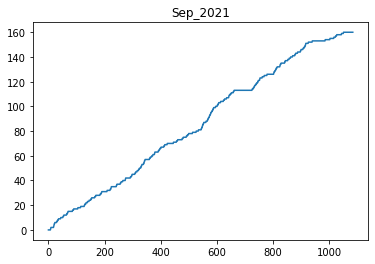

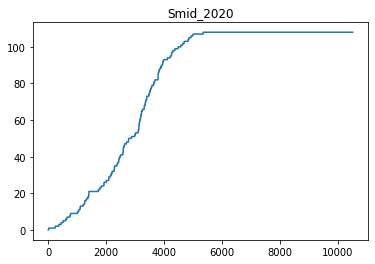

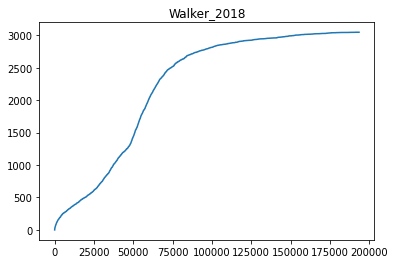

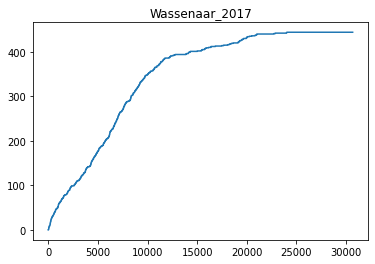

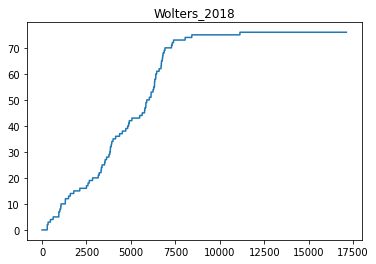

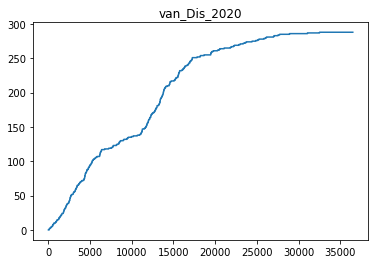

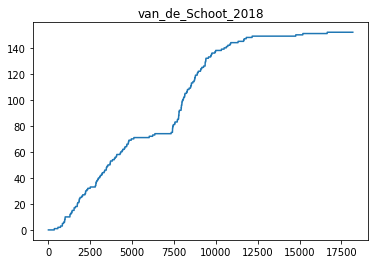

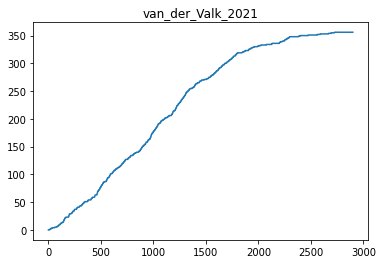

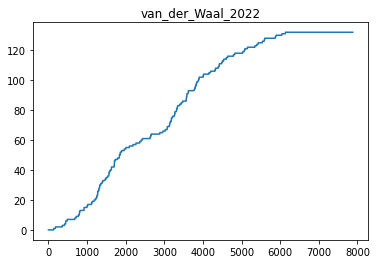

In [5]:
for r, group in table.to_pandas().groupby('review',observed=True):
    fig, ax = plt.subplots()
    ax.set_title(r)
    g = group.sort_values('py', ascending=False)['y'].reset_index(drop=True)
    ax.plot(g.cumsum())
g

In [6]:
group

y        py            pn  \
openalex_id                                                   
https://openalex.org/W3041186171  0  0.368511  6.169279e-01   
https://openalex.org/W2065280657  0  0.995899  1.090860e-06   
https://openalex.org/W3026003237  0  0.078635  9.136888e-01   
https://openalex.org/W2956596526  0  0.997789  5.148950e-07   
https://openalex.org/W3119951367  0  0.765919  2.195609e-01   
...                              ..       ...           ...   
https://openalex.org/W1966405748  0  0.810461  1.466660e-01   
https://openalex.org/W2003839558  0  0.520736  4.665482e-01   
https://openalex.org/W2158128028  0  0.213545  7.668821e-01   
https://openalex.org/W2612568991  0  0.506124  4.687554e-01   
https://openalex.org/W3085737829  0  0.680999  2.987173e-01   

                                             review  \
openalex_id                                           
https://openalex.org/W3041186171  van_der_Waal_2022   
https://openalex.org/W2065280657  van_der_Waal_2022   
https://openalex.org/W3026003237  van_der_Waal_2022   
https://openalex.org/W2956596526  van_der_Waal_2022   
https://openalex.org/W3119951367  van_der_Waal_2022   
...                                             ...   
https://openalex.org/W1966405748  van_der_Waal_2022   
https://openalex.org/W2003839558  van_der_Waal_2022   
https://openalex.org/W2158128028  van_der_Waal_2022   
https://openalex.org/W2612568991  van_der_Waal_2022   
https://openalex.org/W3085737829  van_der_Waal_2022   

                                                                  model  
openalex_id                                                              
https://openalex.org/W3041186171         meta-llama/Llama-2-70b-chat-hf  
https://openalex.org/W2065280657         meta-llama/Llama-2-70b-chat-hf  
https://openalex.org/W3026003237         meta-llama/Llama-2-70b-chat-hf  
https://openalex.org/W2956596526         meta-llama/Llama-2-70b-chat-hf  
https://openalex.org/W3119951367         meta-llama/Llama-2-70b-chat-hf  
...                                                                 ...  
https://openalex.org/W1966405748  meta-llama/Meta-Llama-3.1-8B-Instruct  
https://openalex.org/W2003839558  meta-llama/Meta-Llama-3.1-8B-Instruct  
https://openalex.org/W2158128028  meta-llama/Meta-Llama-3.1-8B-Instruct  
https://openalex.org/W2612568991  meta-llama/Meta-Llama-3.1-8B-Instruct  
https://openalex.org/W3085737829  meta-llama/Meta-Llama-3.1-8B-Instruct  

[7880 rows x 5 columns]

## Database of SVM runs

In [7]:
dbpath = 'output_data/experiments_archive.sql'
dbpath = 'output_data/experiments.sql'
db = database(dbpath)
db.t

ordered_records, reviews, runs

In [8]:
db.t.ordered_records

<Table ordered_records (id, rec_id, screened_order, first_prediction, last_prediction, review_id, relevant, run_id)>

In [9]:
db.t.reviews

<Table reviews (review_id, review_name, n_records, prevalence)>

In [10]:
con = sqlite3.connect(dbpath)
df = pd.read_sql_query('SELECT * FROM reviews',con)
df

review_id              review_name  n_records  prevalence
0           0  Appenzeller-Herzog_2019       2873    0.009050
1           1                 Bos_2018       4878    0.002050
2           2             Brouwer_2019      38114    0.001627
3           3                Chou_2003       1908    0.007862
4           4                Chou_2004       1630    0.005521
5           5             Donners_2021        258    0.058140
6           6                Hall_2012       8793    0.011828
7           7           Jeyaraman_2020       1175    0.081702
8           8            Leenaars_2019       5812    0.002925
9           9            Leenaars_2020       7216    0.080793
10         10            Meijboom_2021        882    0.041950
11         11               Menon_2022        975    0.075897
12         12               Moran_2021       5214    0.021289
13         13               Muthu_2021       2719    0.123575
14         14              Nelson_2002        366    0.218579
15         15                 Oud_2018        952    0.021008
16         16          Radjenovic_2013       5935    0.008088
17         17                 Sep_2021        271    0.147601
18         18                Smid_2020       2627    0.010278
19         19       van_de_Schoot_2018       4544    0.008363
20         20        van_der_Valk_2021        725    0.122759
21         21        van_der_Waal_2022       1970    0.016751
22         22             van_Dis_2020       9128    0.007888
23         23              Walker_2018      48375    0.015752
24         24           Wassenaar_2017       7668    0.014476
25         25             Wolters_2018       4280    0.004439

In [11]:
con = sqlite3.connect(dbpath)
df = pd.read_sql_query('SELECT * FROM runs',con)
df

run_id          exp_started version  thread
0        1  2024-08-06 11:42:31     0.0      69
1        2  2024-08-06 11:42:31     0.0      54
2        3  2024-08-06 11:42:31     0.0      17
3        4  2024-08-06 11:42:31     0.0      93
4        5  2024-08-06 11:42:31     0.0      51
..     ...                  ...     ...     ...
95      96  2024-08-06 11:42:32     0.0      64
96      97  2024-08-06 11:42:32     0.0      21
97      98  2024-08-06 11:42:32     0.0      76
98      99  2024-08-06 11:42:32     0.0      52
99     100  2024-08-06 11:42:32     0.0      44

[100 rows x 4 columns]

In [12]:
stmt = '''
SELECT review_id ,
       Count(DISTINCT run_id) 
FROM   ordered_records
GROUP  BY review_id 
'''
df = pd.read_sql_query(stmt,con)
df

review_id  Count(DISTINCT run_id)
0           0                     100
1           1                     100
2           2                     100
3           3                     100
4           4                     100
5           5                     100
6           6                     100
7           7                     100
8           8                     100
9           9                     100
10         10                     100
11         11                     100
12         12                     100
13         13                     100
14         14                     100
15         15                     100
16         16                     100
17         17                     100
18         18                     100
19         19                     100
20         20                     100
21         21                     100
22         22                     100
23         23                     100
24         24                     100
25         25                     100

In [13]:
# version = '0.0.0'
# #stmt = f'SELECT orr.run_id,rec_id,screened_order,first_prediction,last_prediction,orr.review_id,reviews.review_name,relevant,thread FROM ordered_records orr LEFT JOIN runs ON orr.run_id=runs.run_id LEFT JOIN reviews ON orr.review_id=reviews.review_id WHERE version="{version}"'
# stmt = f'SELECT orr.run_id,rec_id,screened_order,first_prediction,last_prediction,orr.review_id,reviews.review_name,relevant,thread FROM ordered_records orr LEFT JOIN runs ON orr.run_id=runs.run_id LEFT JOIN reviews ON orr.review_id=reviews.review_id'
# #stmt = f'SELECT orr.run_id,rec_id,screened_order,orr.review,relevant,thread FROM ordered_records orr LEFT JOIN runs ON orr.run_id=runs.run_id WHERE version="{version}"'

# #stmt = 'SELECT * FROM ordered_records WHERE run_id=1'
# df = pd.read_sql_query(stmt,con)
# print(df.shape)
# print(df.groupby('review_name')['thread'].nunique())
# df.head()


In [14]:
con = sqlite3.connect(dbpath)
rdf = pd.read_sql_query('SELECT * FROM reviews',con)

if rdf.shape[0]==0:
    reviews = db.t.reviews
    for rdf in iter_datasets():
        print(rdf.name)
        name = rdf.name
        labels = np.fromiter(rdf.labels.values(),dtype=int)
        rr = reviews.insert(
            review_name=rdf.name,
            n_records = labels.shape[0],
            prevalence = labels.sum()/labels.shape[0]
        )
    
rdf = pd.read_sql_query('SELECT * FROM reviews',con)
rdf

review_id              review_name  n_records  prevalence
0           0  Appenzeller-Herzog_2019       2873    0.009050
1           1                 Bos_2018       4878    0.002050
2           2             Brouwer_2019      38114    0.001627
3           3                Chou_2003       1908    0.007862
4           4                Chou_2004       1630    0.005521
5           5             Donners_2021        258    0.058140
6           6                Hall_2012       8793    0.011828
7           7           Jeyaraman_2020       1175    0.081702
8           8            Leenaars_2019       5812    0.002925
9           9            Leenaars_2020       7216    0.080793
10         10            Meijboom_2021        882    0.041950
11         11               Menon_2022        975    0.075897
12         12               Moran_2021       5214    0.021289
13         13               Muthu_2021       2719    0.123575
14         14              Nelson_2002        366    0.218579
15         15                 Oud_2018        952    0.021008
16         16          Radjenovic_2013       5935    0.008088
17         17                 Sep_2021        271    0.147601
18         18                Smid_2020       2627    0.010278
19         19       van_de_Schoot_2018       4544    0.008363
20         20        van_der_Valk_2021        725    0.122759
21         21        van_der_Waal_2022       1970    0.016751
22         22             van_Dis_2020       9128    0.007888
23         23              Walker_2018      48375    0.015752
24         24           Wassenaar_2017       7668    0.014476
25         25             Wolters_2018       4280    0.004439

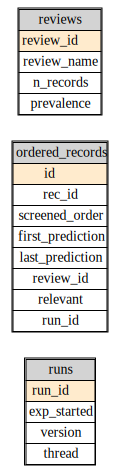

In [15]:
diagram(db.tables)


In [73]:
tdf = pd.DataFrame(
    {'a': [1,2,3], 'b': [1,2,3], 'c': [3,33,3]}
)
tdf.to_parquet(
    'output_data/A_test',
    partition_cols=['a'],
    existing_data_behavior='delete_matching'
)
tdf = pq.read_table('output_data/A_test')
tdf.to_pandas()

b   c  a
0  1   3  1
1  2  33  2
2  3   3  3

In [17]:
db_path = 'output_data/experiments.sql'
version='0.0'
rank=0
con = sqlite3.connect(db_path, timeout=120)
cur = con.cursor()
stmt = f'SELECT run_id FROM runs WHERE version="{version}" AND thread="{rank}";'
cur.execute(stmt)
res = cur.fetchone()
res
run_id = res[0]
run_id

39

In [18]:
tdf = pq.read_table('output_data/A_test')
tdf.to_pandas()

b  a
0  1  1
1  2  2
2  3  3

In [19]:
# stmt = f'SELECT * FROM reviews'
# #stmt = 'SELECT * FROM ordered_records WHERE run_id=1'
# reviews = pd.read_sql_query(stmt,con)
# reviews.head()

In [20]:
# for i, row in reviews.sort_values('n_records').reset_index().iterrows():
#     review_id = row['review_id']
#     rdf = df[df['review_id']==review_id]
#     for i, (name, group) in enumerate(rdf.groupby('thread')):
#         group = group.sort_values('screened_order').reset_index(drop=True)
#         stmt = f'SELECT n_screened, prediction FROM batch_predictions WHERE run_id="{rdf.run_id.values[0]}" AND review_id="{review_id}"'
#         preds = pd.read_sql_query(stmt,con).sort_values('n_screened').reset_index(drop=True)
#         for b, batch in preds.groupby('n_screened'):
#             pass
#         break
#     break
    
# group

In [21]:
# con = sqlite3.connect('output_data/experiments.sql')
# version = '0.0.0'
# stmt = f'SELECT * FROM batch_predictions'
# #stmt = 'SELECT * FROM ordered_records WHERE run_id=1'
# preds = pd.read_sql_query(stmt,con)
# preds

In [22]:
d_map = {}
max_len = 10
for d in iter_datasets():
    ti = d.metadata['publication']['title']
    d_map[d.name] = fill(ti, width=80)
d_map

{'Appenzeller-Herzog_2019': 'Comparative effectiveness of common therapies for Wilson disease: A systematic\nreview and meta‐analysis of controlled studies',
 'Bos_2018': 'Cerebral small vessel disease and the risk of dementia: A systematic review and\nmeta‐analysis of population‐based evidence',
 'Brouwer_2019': 'Psychological theories of depressive relapse and recurrence: A systematic review\nand meta-analysis of prospective studies',
 'Chou_2003': 'Comparative efficacy and safety of long-acting oral opioids for chronic non-\ncancer pain: a systematic review',
 'Chou_2004': 'Comparative efficacy and safety of skeletal muscle relaxants for spasticity and\nmusculoskeletal conditions: a systematic review',
 'Donners_2021': 'Pharmacokinetics and Associated Efficacy of Emicizumab in Humans: A Systematic\nReview',
 'Hall_2012': 'A Systematic Literature Review on Fault Prediction Performance in Software\nEngineering',
 'Jeyaraman_2020': 'Does the Source of Mesenchymal Stem Cell Have an Effe

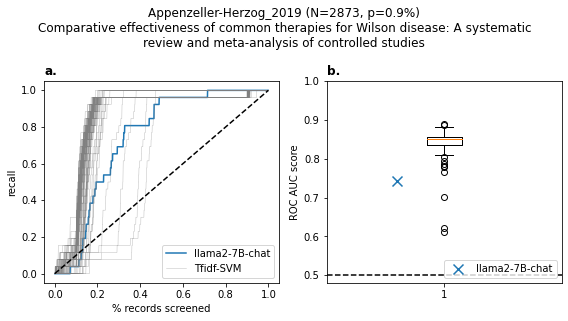

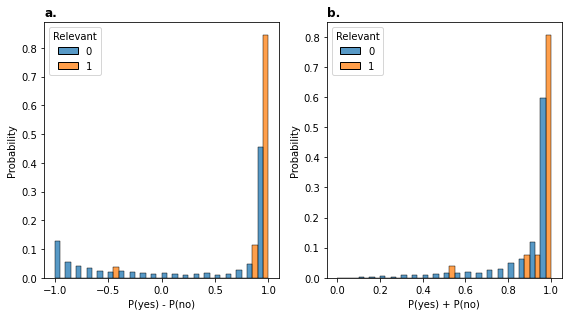

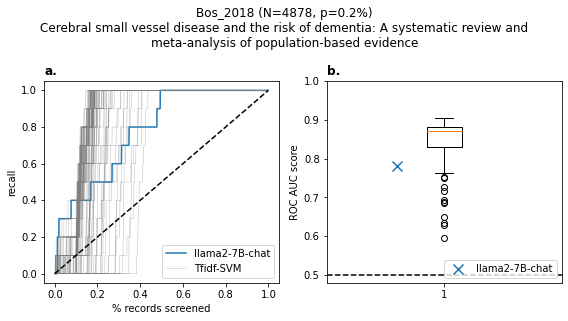

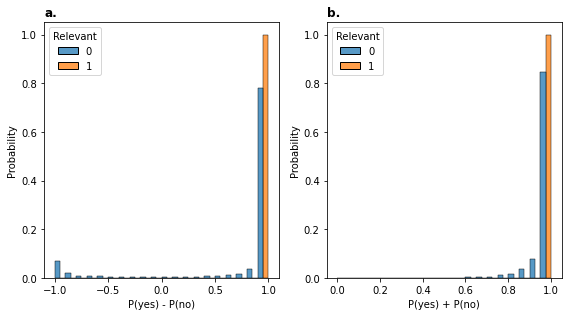

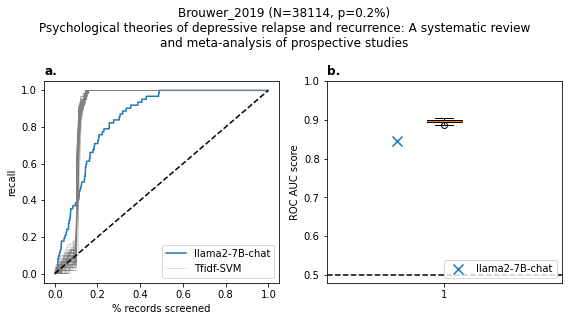

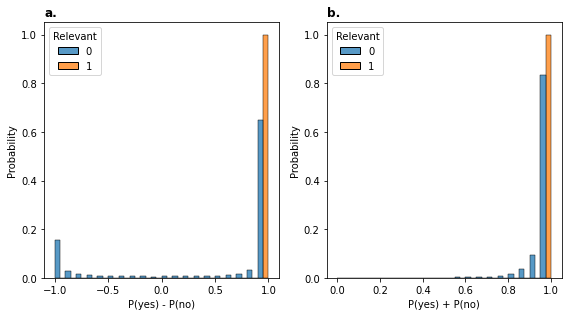

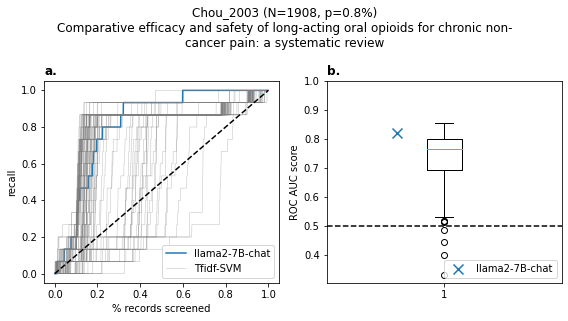

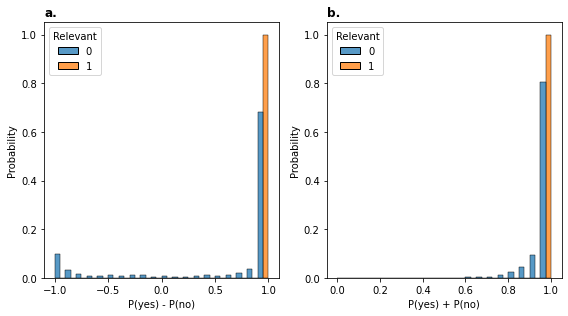

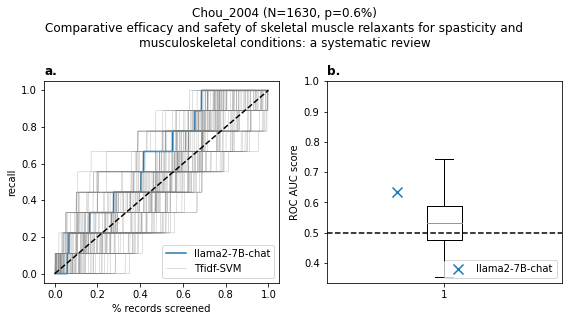

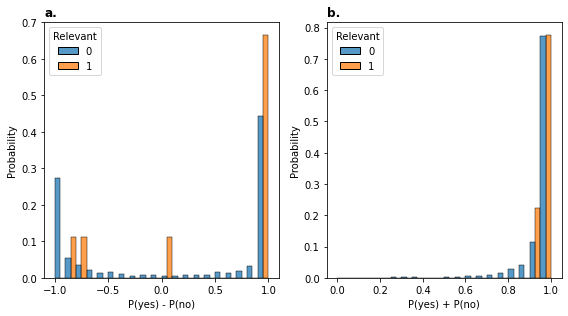

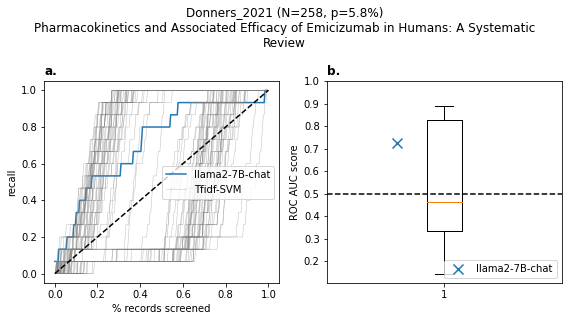

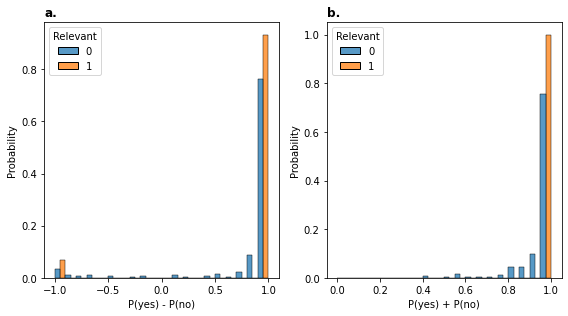

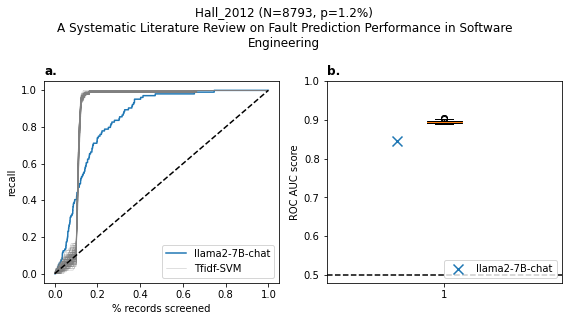

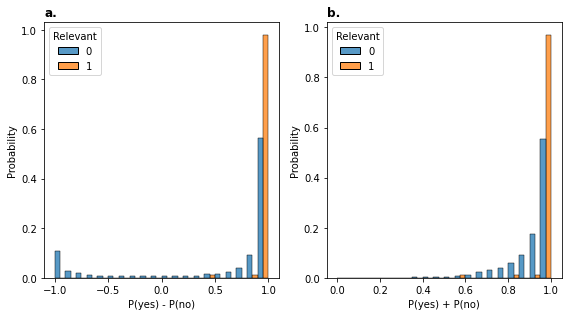

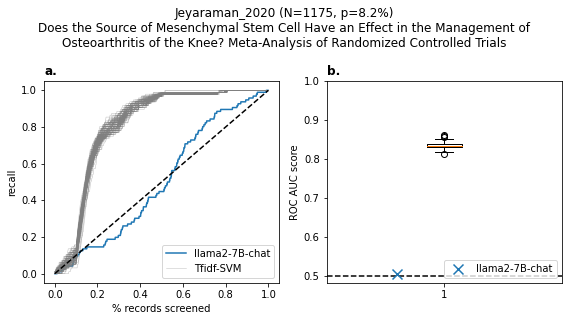

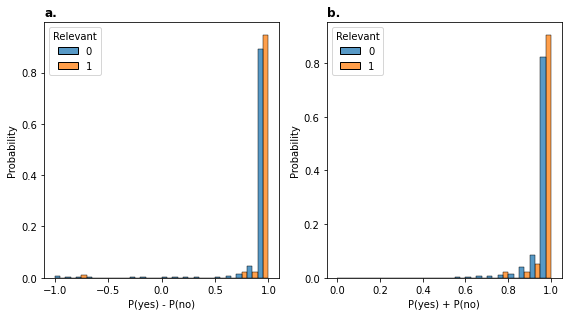

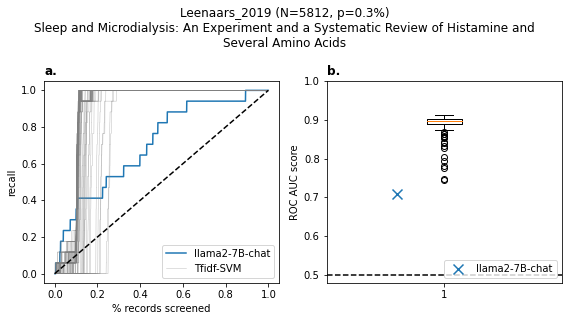

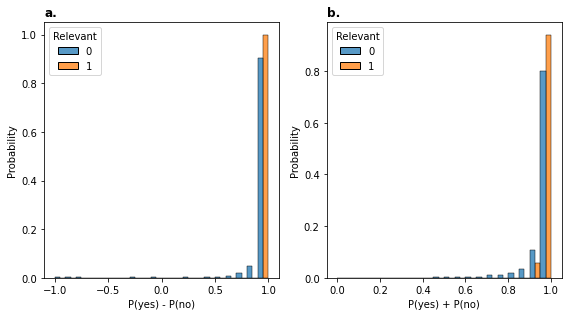

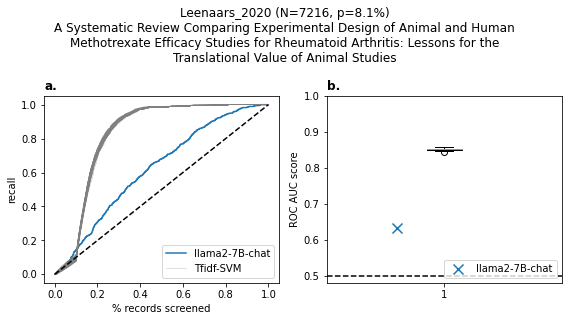

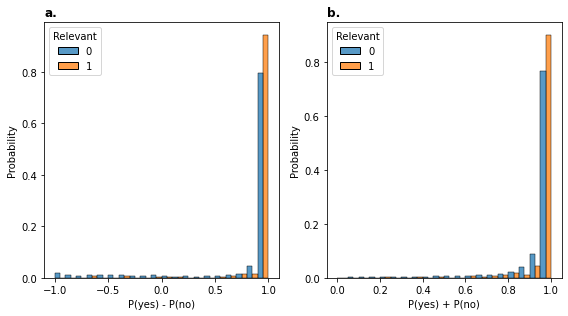

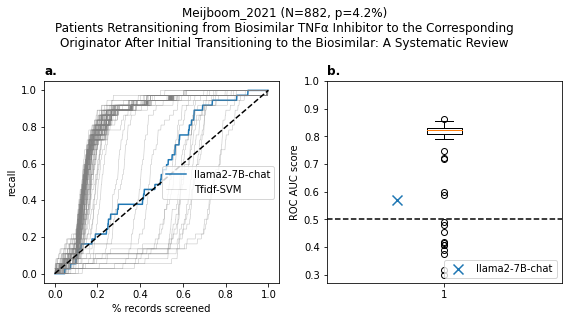

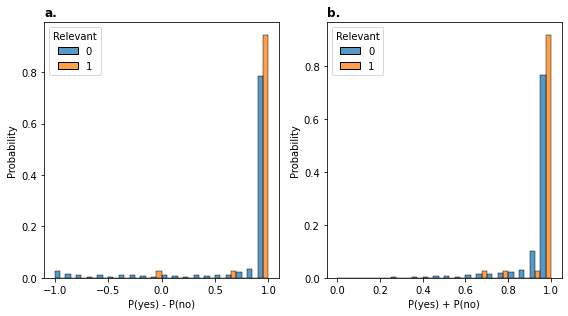

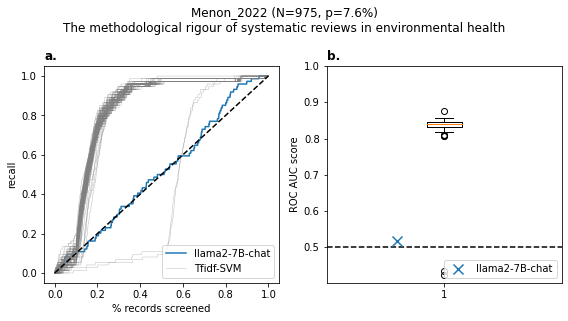

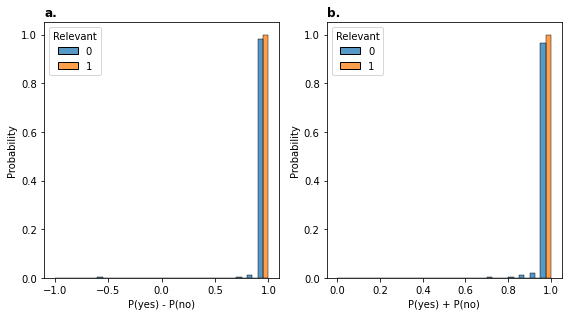

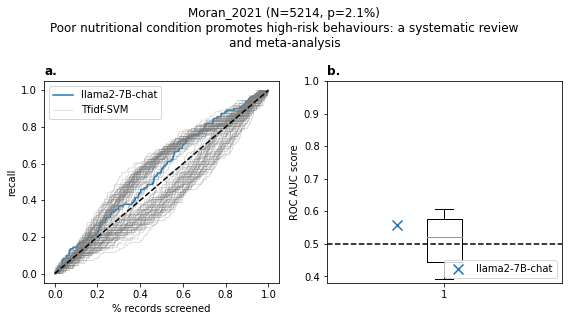

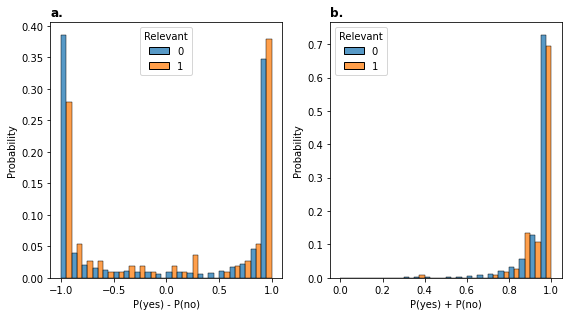

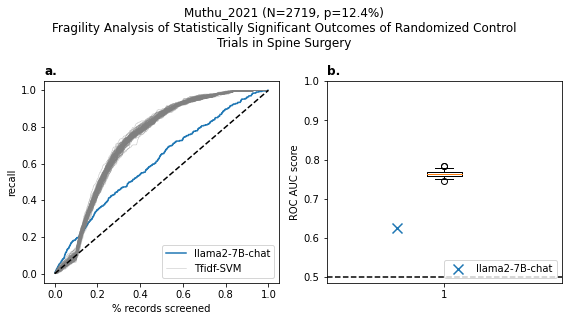

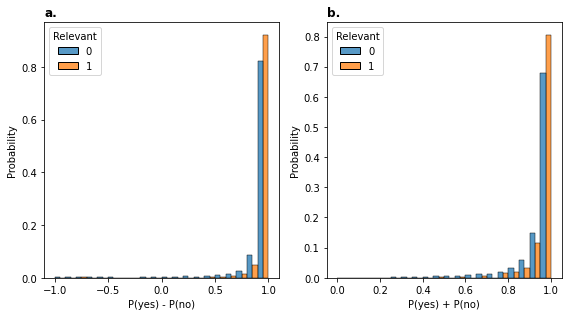

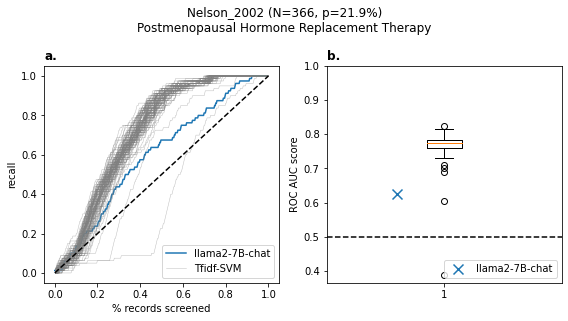

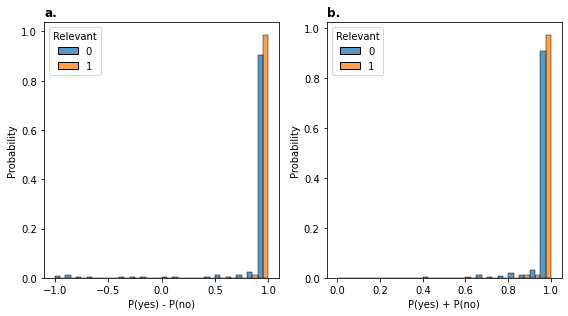

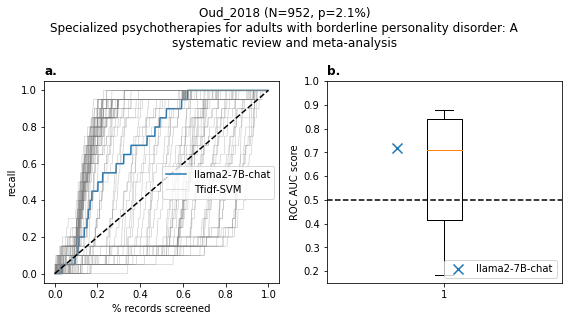

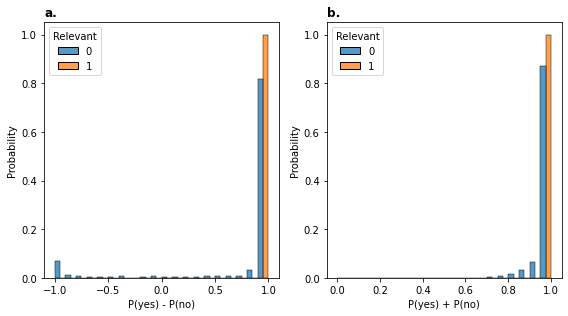

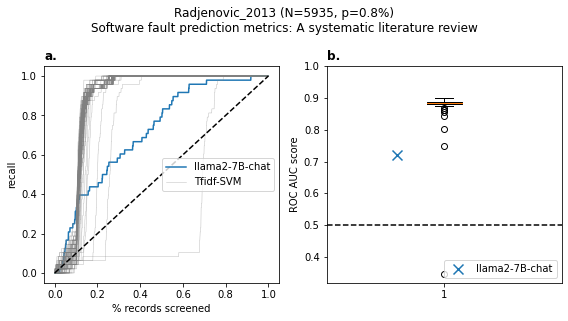

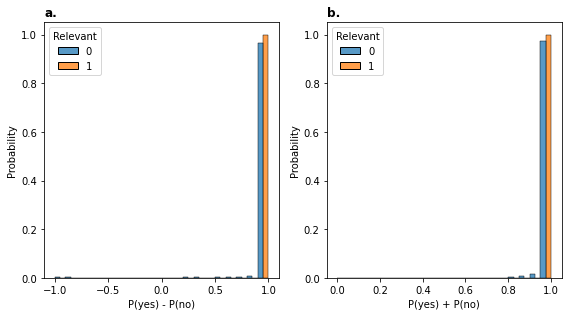

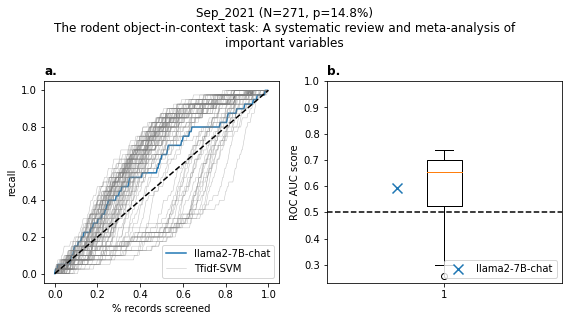

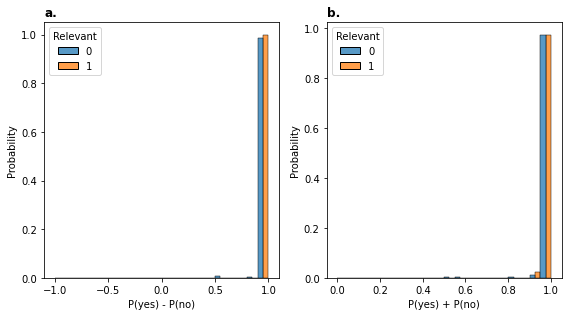

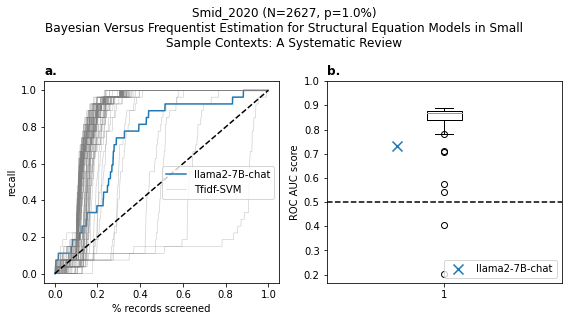

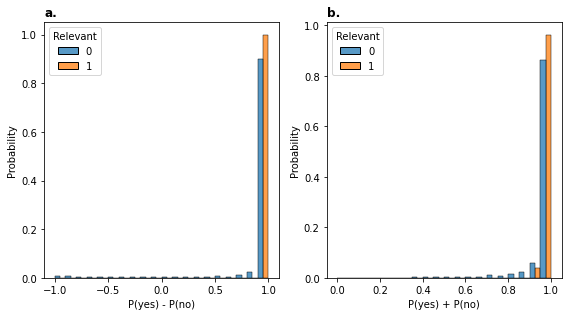

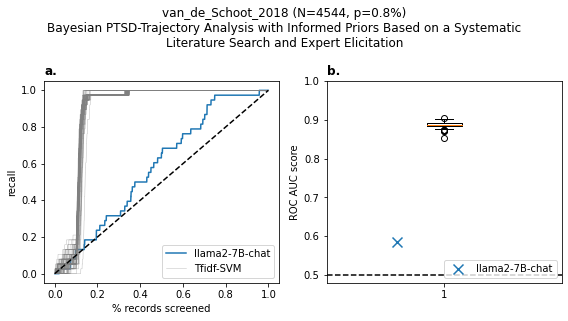

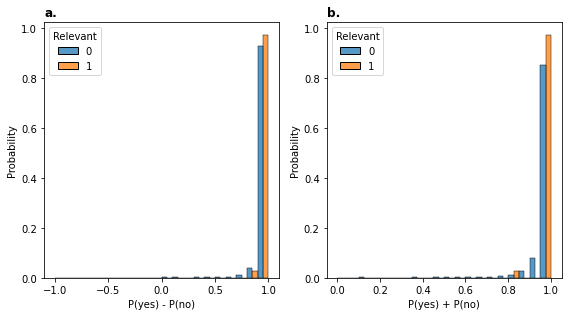

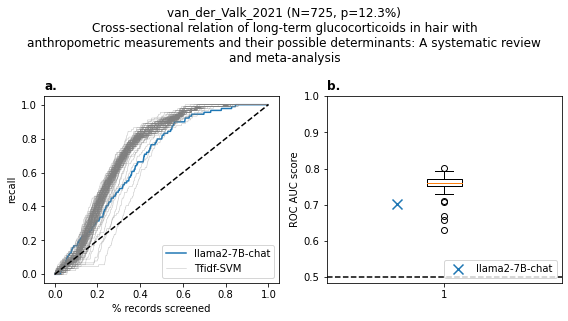

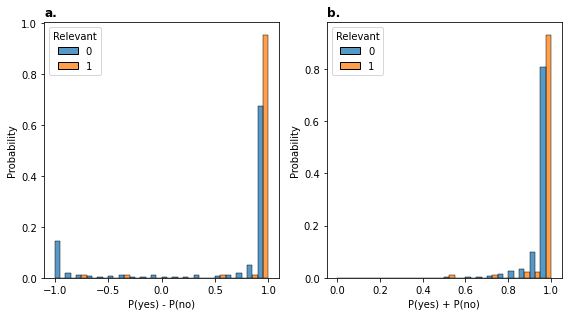

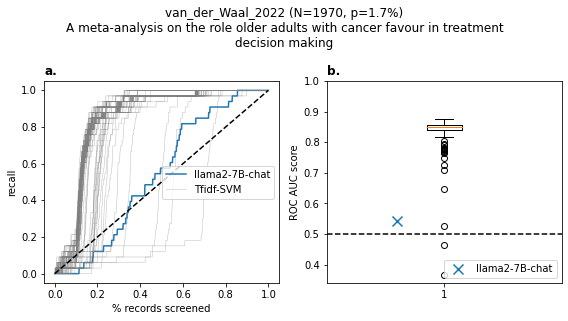

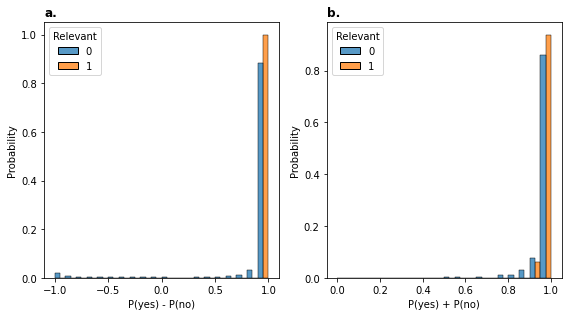

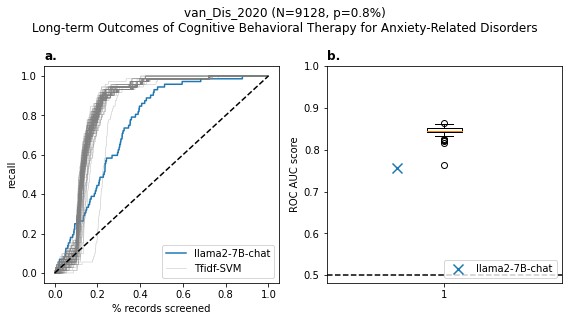

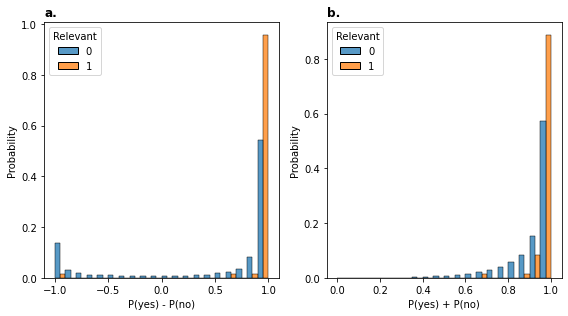

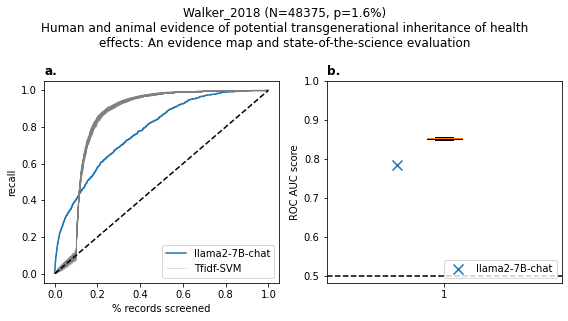

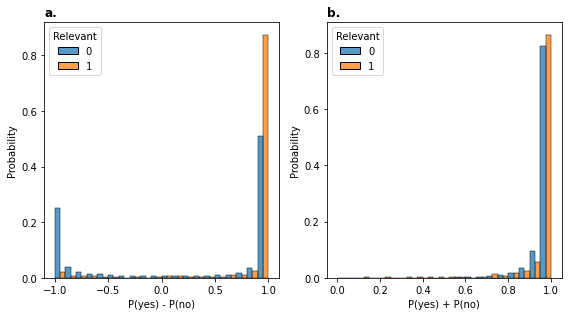

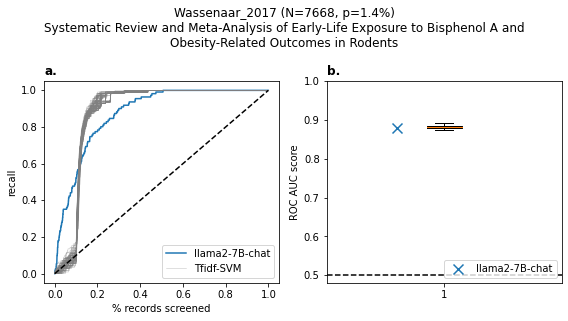

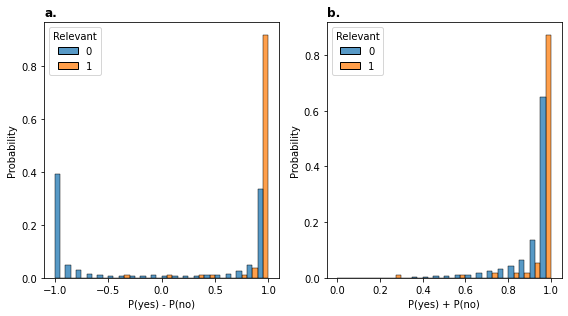

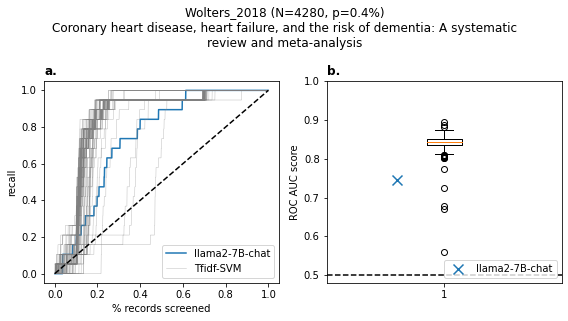

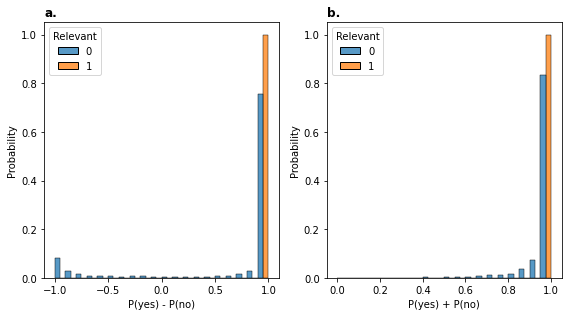

In [25]:

svm_auc_scores = []
llm_auc_scores = []
llm_alt_auc_scores = []
reviews = []

def order_score(x):
    return 1-(x-x.min())/(x.max()-x.min())

for r, row in rdf.iterrows():
    table = pq.read_table(
        'output_data/ordered_records', 
        filters=[('review_id', '=', row['review_id'])]
    )
    
    review_name = row['review_name']
    llm_df = pd.read_csv(f'output_data/{review_name}_LLM.csv').dropna()

    llm_df['pred'] = llm_df['py'] - llm_df['pn']    
    llm_df['pmass'] = llm_df['py'] + llm_df['pn']
    llm_df['alt_pred'] = llm_df['pred'] * llm_df['pmass']
    # Sort LLM results in descending order of pred, the order we would screen them
    llm_df = llm_df.sort_values('pred', ascending=False)
    # Calculate recall, the order, and x, the proportion of documents screened
    
    llm_df['recall'] = llm_df['y'].cumsum() / llm_df['y'].sum()
    llm_df['order'] = np.arange(llm_df.shape[0])
    llm_df['x'] = llm_df['order'] / llm_df.shape[0] 
    
    # Setup graph with two panels
    fig, axs = plt.subplots(1,2, figsize=(8,4.5))
    ax = axs[0]
    
    # Plot LLM recall curve
    ax.plot(llm_df['x'], llm_df['recall'], label='llama2-7B-chat')
    
    
    study_title = f'{review_name} (N={llm_df.shape[0]}, p={llm_df["y"].sum()/llm_df.shape[0]:.1%})'
    reviews.append(study_title)
    plt.suptitle(study_title + '\n' + d_map[review_name])
    
    #  Go through each active learning run, and plot progress
    aucs = []
    
    for i, (name, group) in enumerate(table.to_pandas().groupby('run_id', observed=False)):
        group = group.sort_values('screened_order').reset_index()
        group['score'] = order_score(group['screened_order'])
        group['x'] = group['screened_order'] / group.shape[0]
        group['recall'] = group['relevant'].cumsum()/group['relevant'].sum()
        aucs.append(roc_auc_score(group['relevant'],group['score']))
        ax.plot(group['x'], group['recall'], color='grey',alpha=0.5,lw=0.5, label='Tfidf-SVM' if i==0 else None)
    svm_auc_scores.append(aucs)
    
    # Plot a diagonal line showing random chance
    ax.plot([0,1],[0,1], color='black',ls='--')
    
    ax.legend()
    
    # Show the distribution of ROC AUC scores
    axs[1].boxplot(aucs)
    axs[1].axhline(0.5, color='black', ls='--')
    
    # Calculate LLM ROC AUC score and plot it with an x
    auc = roc_auc_score(llm_df['y'], llm_df['pred'])
    llm_auc_scores.append(auc)
    alt_auc = roc_auc_score(llm_df['y'], llm_df['alt_pred'])
    llm_alt_auc_scores.append(alt_auc)
    axs[1].scatter(
        0.8, auc,     
        marker='x',
        s=100,
        zorder=50,
        label='llama2-7B-chat'
    )
    
    # Legend and axis labels
    axs[1].legend(loc='lower right')
    axs[0].set_xlabel('% records screened')
    axs[0].set_ylabel('recall')
    axs[1].set_ylim(ymax=1)
    axs[1].set_ylabel('ROC AUC score')
    axs[0].set_title('a.', loc='left', fontweight='bold')
    axs[1].set_title('b.', loc='left', fontweight='bold')
    plt.tight_layout()
    plt.savefig(f'figures/{review_name}.pdf', bbox_inches='tight')
    plt.show()
    
    # New plot for distribution of p scores
    fig, axs = plt.subplots(1,2, figsize=(8,4.5))

    # Distribution of p(Yes)-P(no)
    g = sns.histplot(
        llm_df, hue='y', x='pred', stat='probability', 
        multiple='dodge', common_norm=False, ax=axs[0],
        binwidth=0.1, binrange=[-1,1], legend=True,
    )
    leg = g.axes.get_legend()
    leg.set_title('Relevant')
    axs[0].set_xlabel('P(yes) - P(no)')
    
    # Distribution of p(Yes)+P(no)
    g = sns.histplot(
        llm_df, hue='y', x='pmass', stat='probability', 
        multiple='dodge', common_norm=False, ax=axs[1],
        binwidth=0.05, binrange=[0,1], legend=True,
    )
    leg = g.axes.get_legend()
    leg.set_title('Relevant')
    axs[1].set_xlabel('P(yes) + P(no)')
    
    axs[0].set_title('a.', loc='left', fontweight='bold')
    axs[1].set_title('b.', loc='left', fontweight='bold')
    #plt.suptitle(study_title + '\n' + d_map[review])
    
    fig.tight_layout()
    plt.savefig(f'figures/{review_name}_p_distribution.pdf', bbox_inches='tight')
    plt.show()


In [26]:
table

pyarrow.Table
rec_id: string
screened_order: double
relevant: int64
first_prediction: double
last_prediction: double
review_id: dictionary<values=int32, indices=int32, ordered=0>
run_id: dictionary<values=int32, indices=int32, ordered=0>
----
rec_id: [["https://openalex.org/W2478209357","https://openalex.org/W2095179087","https://openalex.org/W1955235752","https://openalex.org/W2373924009","https://openalex.org/W1997922550",...,"https://openalex.org/W1995096921","https://openalex.org/W1504586396","https://openalex.org/W2114922669","https://openalex.org/W1657669688","https://openalex.org/W1994490975"],["https://openalex.org/W2478209357","https://openalex.org/W2095179087","https://openalex.org/W1955235752","https://openalex.org/W2373924009","https://openalex.org/W1997922550",...,"https://openalex.org/W1995096921","https://openalex.org/W1504586396","https://openalex.org/W2114922669","https://openalex.org/W1657669688","https://openalex.org/W1994490975"],...,["https://openalex.org/W24782093

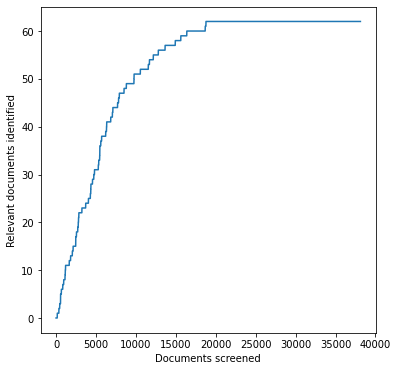

In [15]:
review = 'Brouwer_2019'
llm_df = pd.read_csv(f'output_data/{review}_LLM.csv').dropna()
fig, ax = plt.subplots(figsize=(6,6))


llm_df.sort_values('py', ascending=False).reset_index(drop=True).y.cumsum().plot()
ax.set_xlabel('Documents screened')
ax.set_ylabel('Relevant documents identified')

plt.savefig('figures/LLM_Brouwer_simple.pdf', bbox_inches='tight')

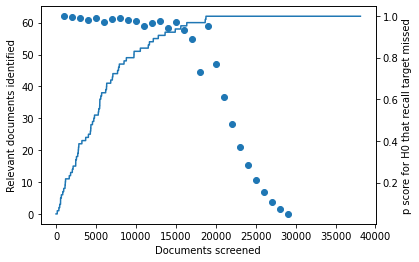

In [16]:
from buscarpy import retrospective_h0

y = llm_df.sort_values('py', ascending=False).reset_index(drop=True).y
h0 = retrospective_h0(y, llm_df.shape[0])

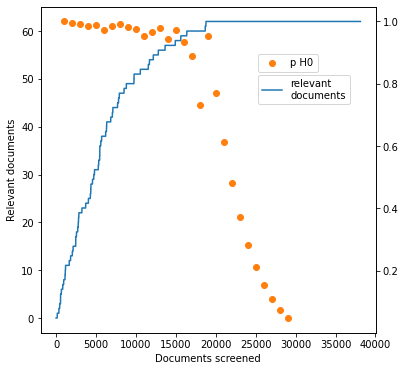

In [17]:
fig, ax = plt.subplots(figsize=(6,6))

ax.plot(y.cumsum(), label='relevant\ndocuments')

ax.set_ylabel('Relevant documents')

ax2 = ax.twinx()

ax2.scatter(h0['batch_sizes'], h0['p'], c='C1', label='p H0')

ax.legend(loc=(0.65,0.7))
ax2.legend(loc=(0.65, 0.8))
ax.set_xlabel('Documents screened')

plt.savefig('figures/stopping.pdf', bbox_inches='tight')

In [18]:
df

review_id  Count(DISTINCT run_id)
0           0                     100
1           1                     100
2           2                     100
3           3                     100
4           4                     100
5           5                     100
6           6                     100
7           7                     100
8           8                     100
9           9                     100
10         10                     100
11         11                     100
12         12                     100
13         13                     100
14         14                     100
15         15                     100
16         16                     100
17         17                     100
18         18                     100
19         19                     100
20         20                     100
21         21                     100
22         22                     100
23         23                     100
24         24                     100
25         25                     100

In [19]:
df.thread.unique()

AttributeError: 'DataFrame' object has no attribute 'thread'

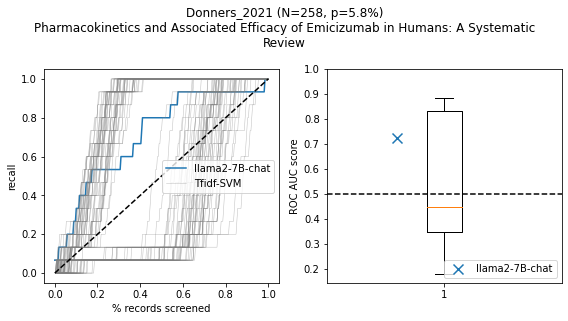

/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When groupin

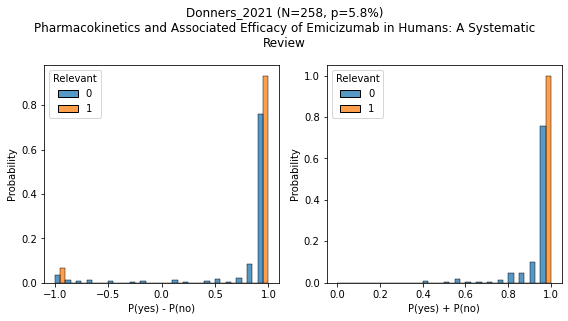

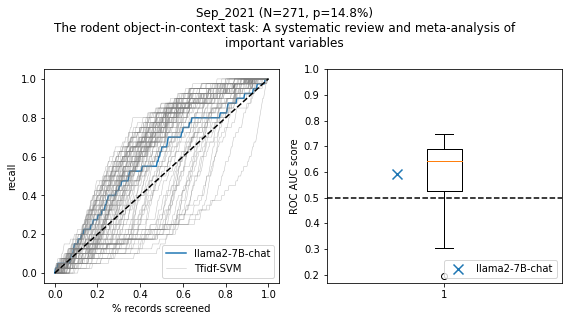

/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When groupin

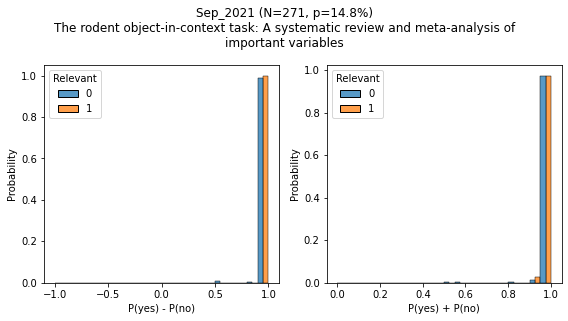

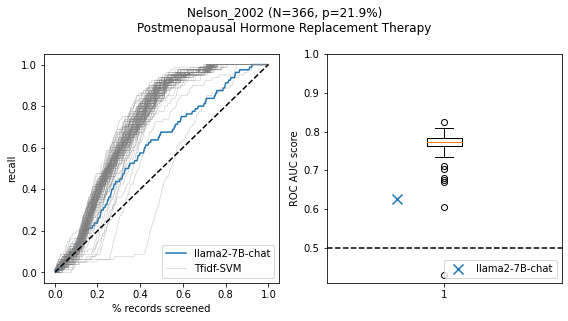

/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When groupin

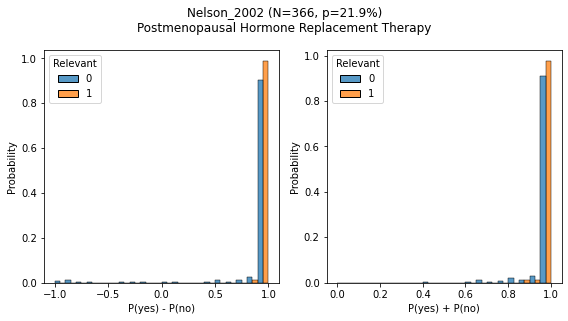

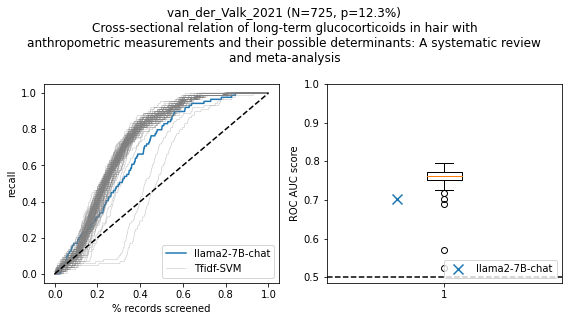

/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When groupin

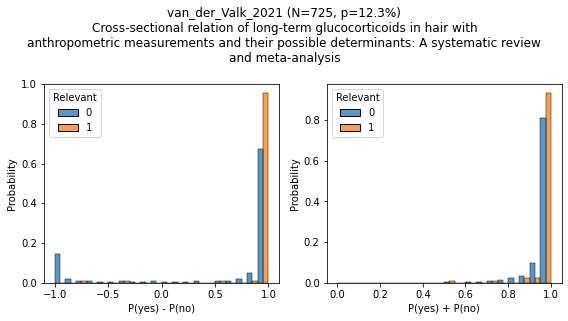

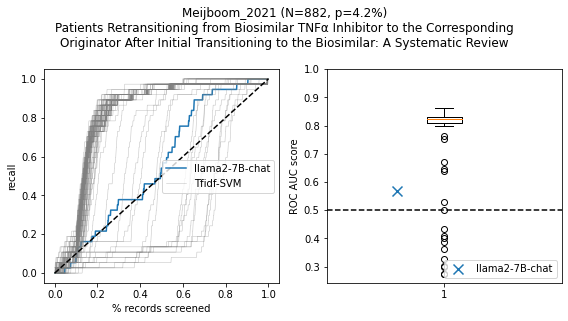

/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When groupin

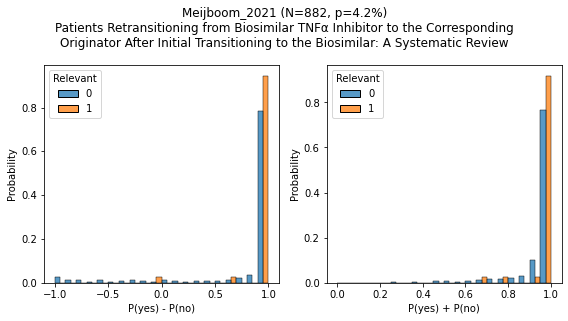

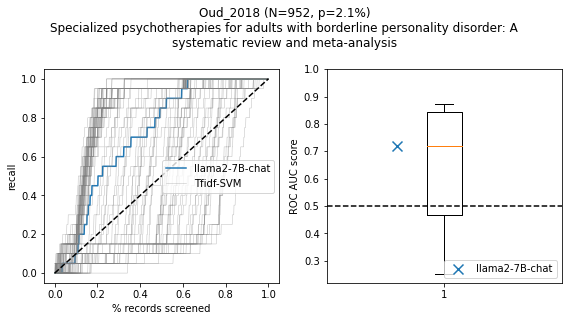

/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When groupin

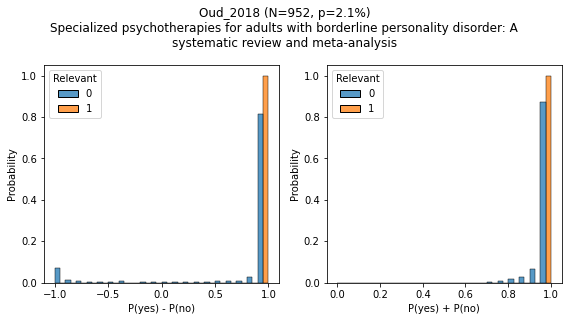

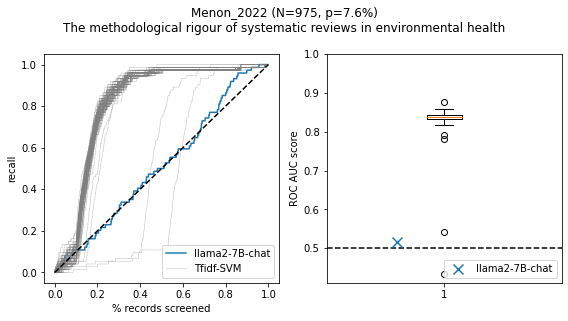

/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When groupin

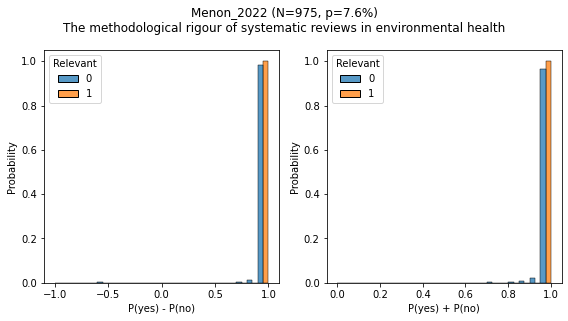

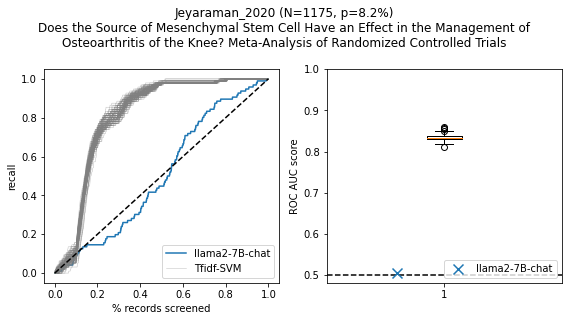

/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When groupin

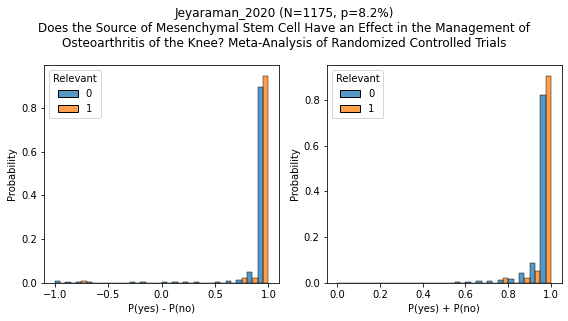

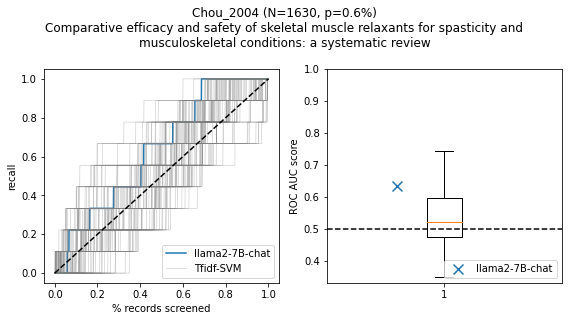

/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When groupin

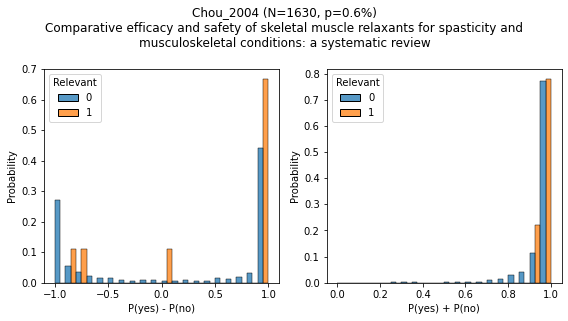

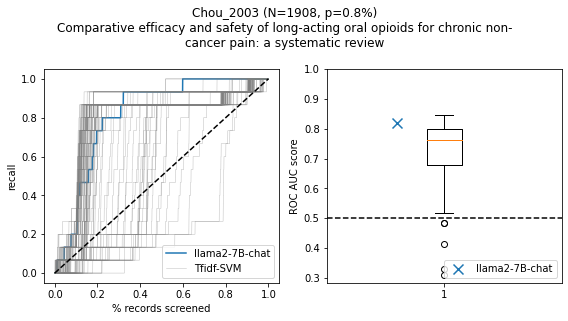

/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When groupin

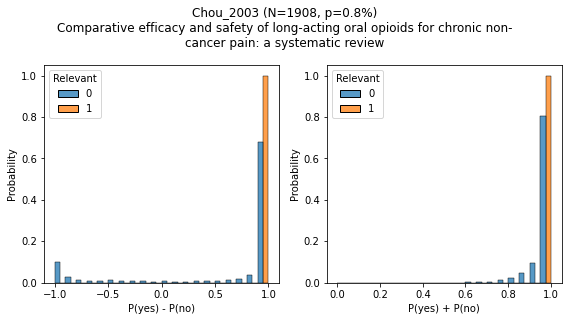

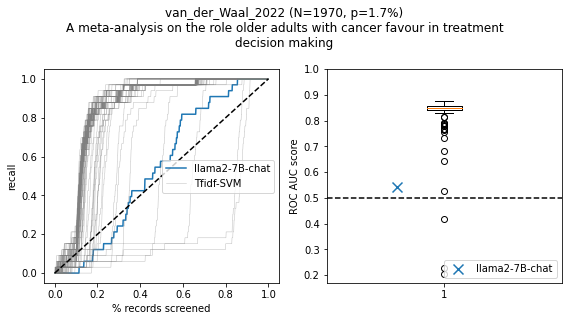

/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When groupin

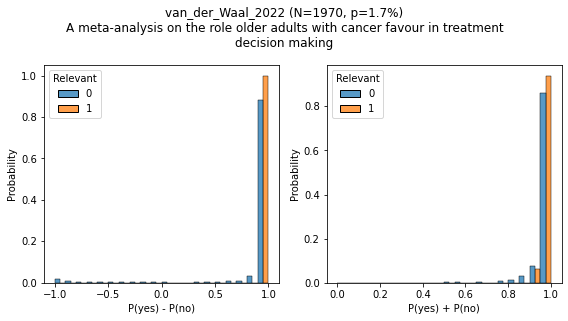

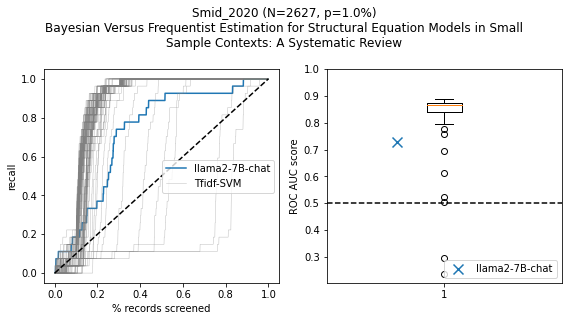

/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When groupin

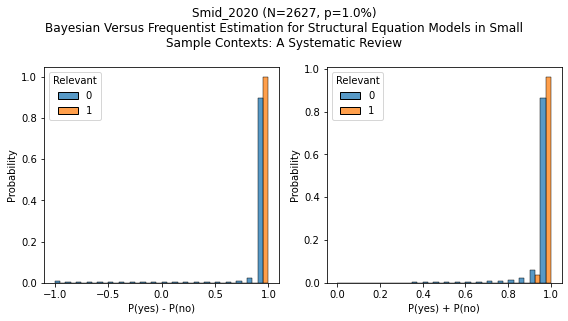

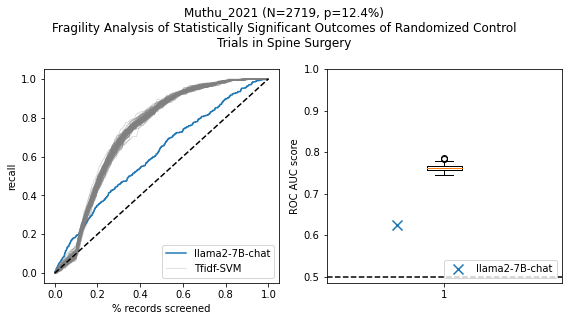

/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When groupin

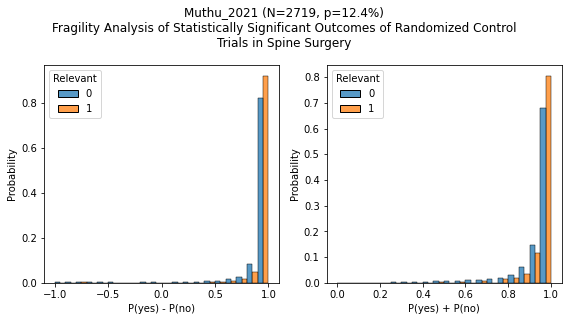

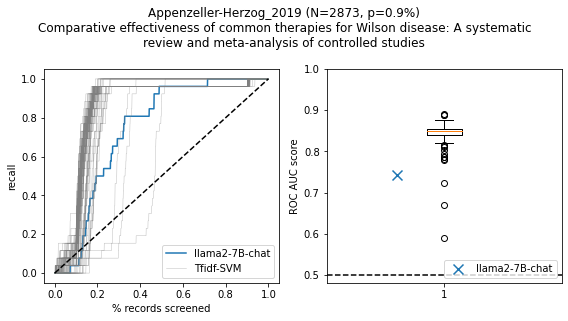

/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When groupin

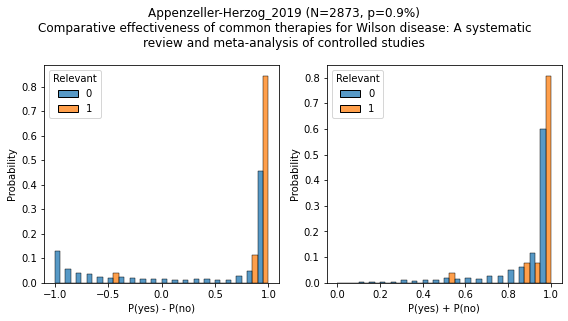

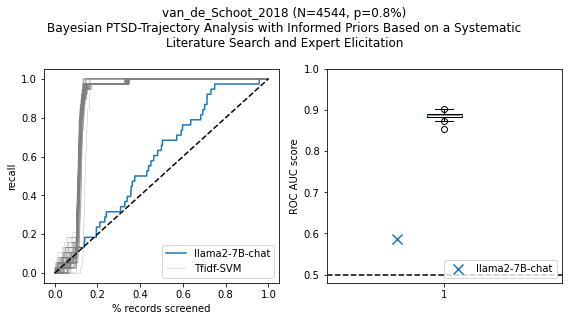

/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When groupin

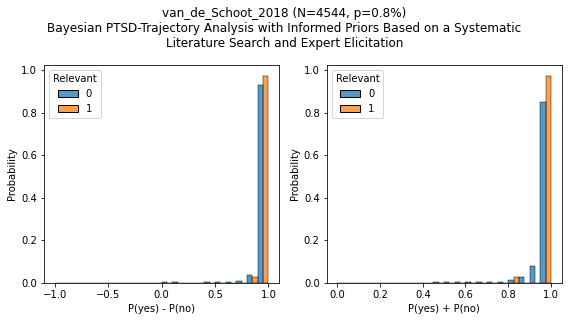

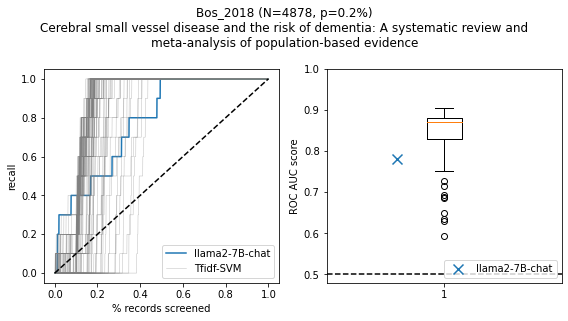

/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When groupin

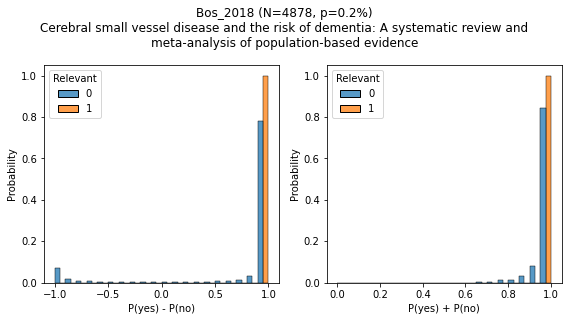

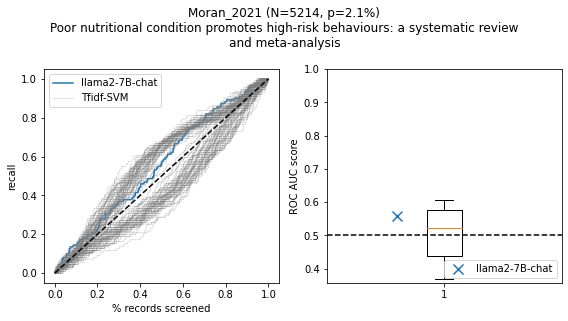

/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When groupin

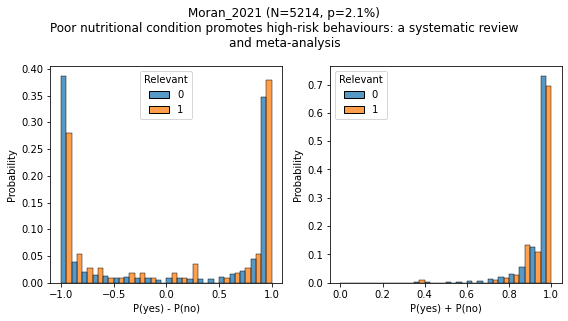

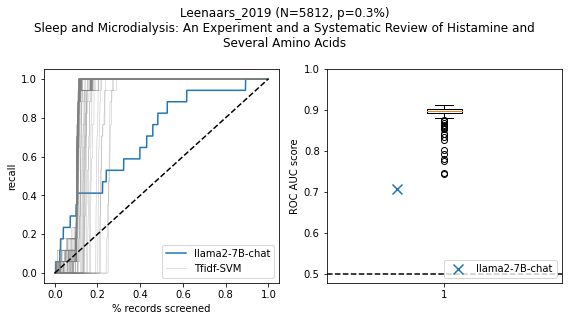

/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When groupin

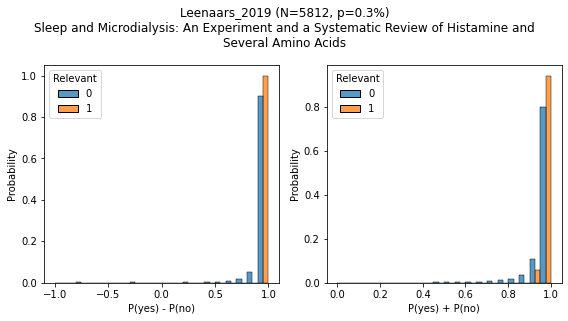

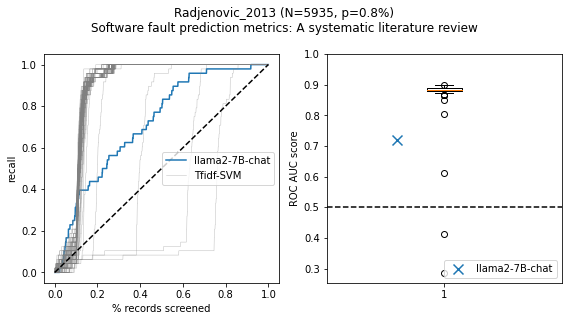

/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When groupin

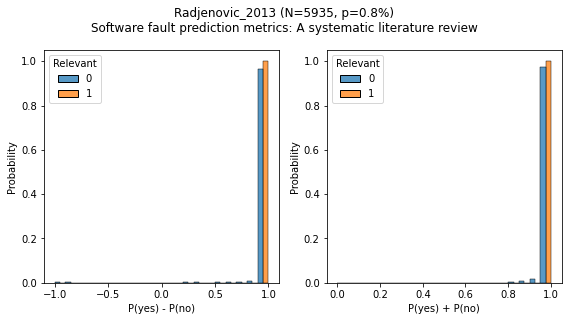

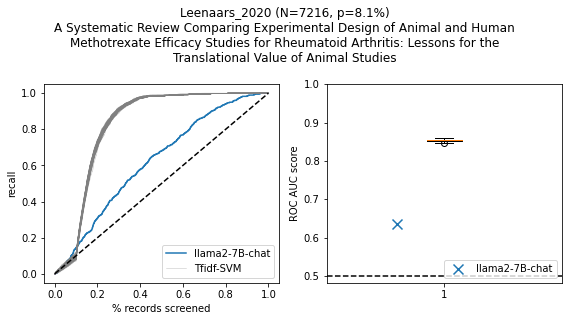

/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When groupin

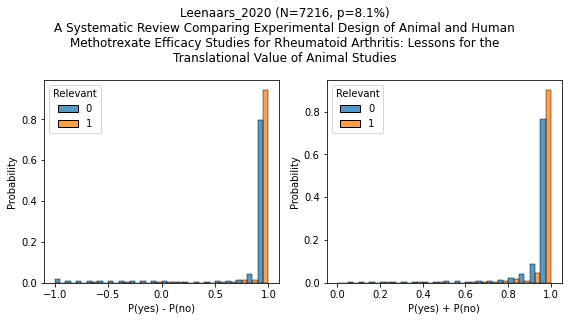

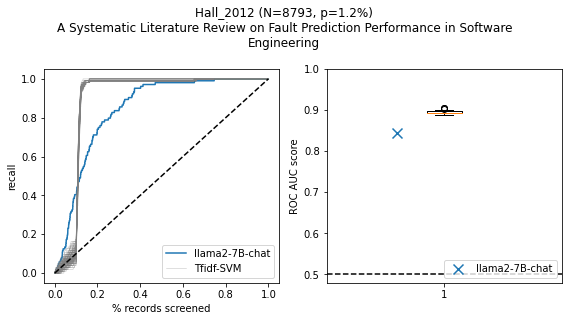

/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When groupin

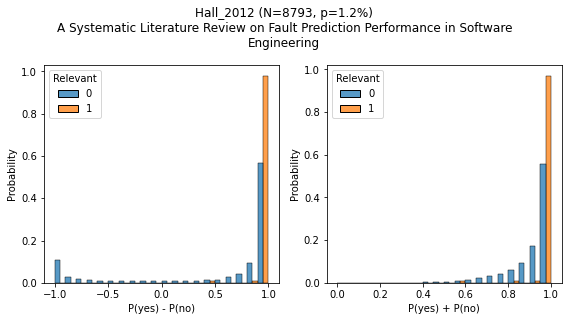

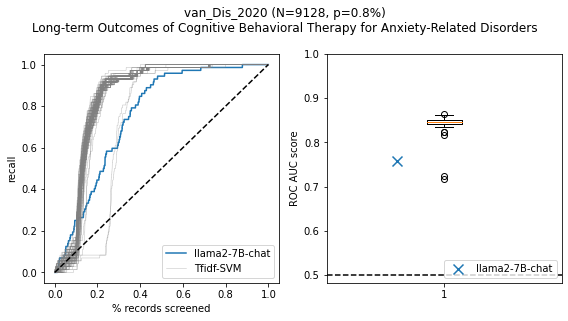

/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When groupin

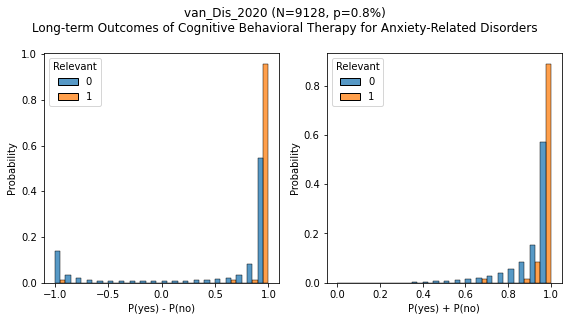

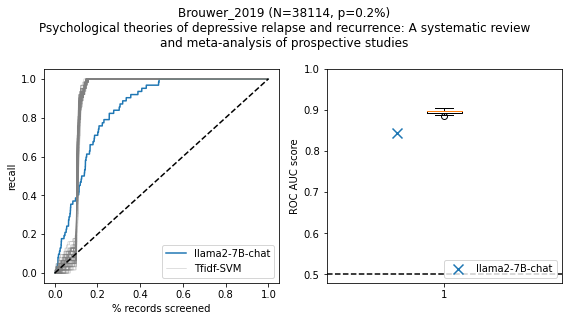

/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/max/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When groupin

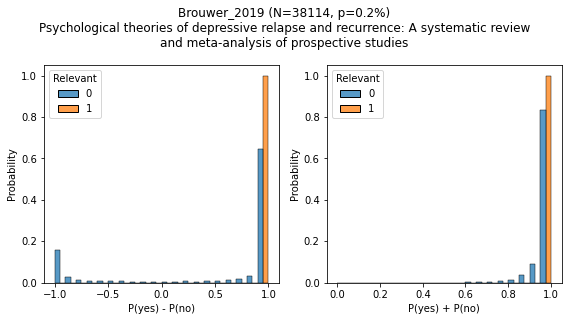

In [16]:
svm_auc_scores = []
llm_auc_scores = []
llm_alt_auc_scores = []
reviews = []

for i, row in df.groupby('review')['screened_order'].max().sort_values().reset_index().iterrows():
    review = row['review']
    rdf = df[df['review']==review]
    llm_df = pd.read_csv(f'output_data/{review}_LLM.csv').dropna()
    try:
        llm_df = pd.read_csv(f'output_data/{review}_LLM.csv').dropna()
    except:
        continue
    if llm_df.shape[0] < 5:
        continue
    llm_df['pred'] = llm_df['py'] - llm_df['pn']    
    llm_df['pmass'] = llm_df['py'] + llm_df['pn']
    llm_df['alt_pred'] = llm_df['pred'] * llm_df['pmass']
    # Sort LLM results in descending order of pred, the order we would screen them
    llm_df = llm_df.sort_values('pred', ascending=False)
    # Calculate recall, the order, and x, the proportion of documents screened
    
    llm_df['recall'] = llm_df['y'].cumsum() / llm_df['y'].sum()
    llm_df['order'] = np.arange(llm_df.shape[0])
    llm_df['x'] = llm_df['order'] / llm_df.shape[0] 
    
    # Setup graph with two panels
    fig, axs = plt.subplots(1,2, figsize=(8,4.5))
    ax = axs[0]
    
    # Plot LLM recall curve
    ax.plot(llm_df['x'], llm_df['recall'], label='llama2-7B-chat')
    
    study_title = f'{review} (N={llm_df.shape[0]}, p={llm_df["y"].sum()/llm_df.shape[0]:.1%})'
    reviews.append(study_title)
    plt.suptitle(study_title + '\n' + d_map[review])
    
    #  Go through each active learning run, and plot progress
    aucs = []
    for i, (name, group) in enumerate(rdf.groupby('thread')):
        group = group.sort_values('screened_order').reset_index()
        group['score'] = order_score(group['screened_order'])
        group['x'] = group['screened_order'] / group.shape[0]
        group['recall'] = group['relevant'].cumsum()/group['relevant'].sum()
        aucs.append(roc_auc_score(group['relevant'],group['score']))
        ax.plot(group['x'], group['recall'], color='grey',alpha=0.5,lw=0.5, label='Tfidf-SVM' if i==0 else None)
    svm_auc_scores.append(aucs)
    
    # Plot a diagonal line showing random chance
    ax.plot([0,1],[0,1], color='black',ls='--')
    
    ax.legend()
    
    # Show the distribution of ROC AUC scores
    axs[1].boxplot(aucs)
    axs[1].axhline(0.5, color='black', ls='--')
    
    # Calculate LLM ROC AUC score and plot it with an x
    auc = roc_auc_score(llm_df['y'], llm_df['pred'])
    llm_auc_scores.append(auc)
    alt_auc = roc_auc_score(llm_df['y'], llm_df['alt_pred'])
    llm_alt_auc_scores.append(alt_auc)
    axs[1].scatter(
        0.8, auc,     
        marker='x',
        s=100,
        zorder=50,
        label='llama2-7B-chat'
    )
    
    # Legend and axis labels
    axs[1].legend(loc='lower right')
    axs[0].set_xlabel('% records screened')
    axs[0].set_ylabel('recall')
    axs[1].set_ylim(ymax=1)
    axs[1].set_ylabel('ROC AUC score')
    plt.tight_layout()
    plt.savefig(f'figures/{review}.pdf', bbox_inches='tight')
    plt.show()
    
    # New plot for distribution of p scores
    fig, axs = plt.subplots(1,2, figsize=(8,4.5))

    # Distribution of p(Yes)-P(no)
    g = sns.histplot(
        llm_df, hue='y', x='pred', stat='probability', 
        multiple='dodge', common_norm=False, ax=axs[0],
        binwidth=0.1, binrange=[-1,1], legend=True,
    )
    leg = g.axes.get_legend()
    leg.set_title('Relevant')
    axs[0].set_xlabel('P(yes) - P(no)')
    
    # Distribution of p(Yes)+P(no)
    g = sns.histplot(
        llm_df, hue='y', x='pmass', stat='probability', 
        multiple='dodge', common_norm=False, ax=axs[1],
        binwidth=0.05, binrange=[0,1], legend=True,
    )
    leg = g.axes.get_legend()
    leg.set_title('Relevant')
    axs[1].set_xlabel('P(yes) + P(no)')
    plt.suptitle(study_title + '\n' + d_map[review])
    
    fig.tight_layout()
    plt.savefig(f'figures/{review}_p_distribution.pdf', bbox_inches='tight')
    plt.show()


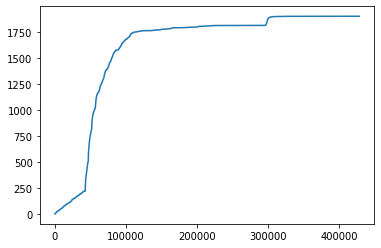

In [41]:
x = table.sort_by('screened_order')['relevant'].to_numpy()
plt.plot(x.cumsum())

In [64]:
from buscarpy import retrospective_h0
table = pq.read_table(
    'output_data/ordered_records', 
    filters=[
        ('review_id', '=', row['review_id']),
        ('run_id', '=', run_id)
    ]
).to_pandas().sort_values('screened_order').reset_index(drop=True)
for recall_target in [0.8,0.9,0.95,0.99]:
    pdf = pd.DataFrame(
        retrospective_h0(table['relevant'], table.shape[0], batch_size=100, plot=False, recall_target=recall_target, confidence_level=0.99)
    ).rename(columns={'p': f'p_{recall_target}'})
    table = table.merge(pdf, left_on='screened_order', right_on='batch_sizes', how='left').drop(columns='batch_sizes').ffill()
table

rec_id  screened_order  relevant  \
0     https://openalex.org/W2340708520             1.0         0   
1     https://openalex.org/W1965718591             2.0         0   
2     https://openalex.org/W2105215475             3.0         0   
3     https://openalex.org/W2323486441             4.0         0   
4     https://openalex.org/W2124479124             5.0         0   
...                                ...             ...       ...   
4275  https://openalex.org/W2549850175          4276.0         0   
4276  https://openalex.org/W2554191060          4277.0         0   
4277  https://openalex.org/W2021656917          4278.0         0   
4278  https://openalex.org/W2092534928          4279.0         0   
4279  https://openalex.org/W2029486004          4280.0         0   

      first_prediction  last_prediction review_id run_id     p_0.8     p_0.9  \
0                  NaN              NaN        25     39       NaN       NaN   
1                  NaN              NaN        25     39       NaN       NaN   
2                  NaN              NaN        25     39       NaN       NaN   
3                  NaN              NaN        25     39       NaN       NaN   
4                  NaN              NaN        25     39       NaN       NaN   
...                ...              ...       ...    ...       ...       ...   
4275          0.004685         0.000324        25     39  0.006882  0.005885   
4276          0.004447         0.000313        25     39  0.006882  0.005885   
4277          0.004084         0.000312        25     39  0.006882  0.005885   
4278          0.004968         0.000274        25     39  0.006882  0.005885   
4279          0.005069         0.000254        25     39  0.006882  0.005885   

        p_0.95    p_0.99  
0          NaN       NaN  
1          NaN       NaN  
2          NaN       NaN  
3          NaN       NaN  
4          NaN       NaN  
...        ...       ...  
4275  0.008911  0.048885  
4276  0.008911  0.048885  
4277  0.008911  0.048885  
4278  0.008911  0.048885  
4279  0.008911  0.000000  

[4280 rows x 11 columns]

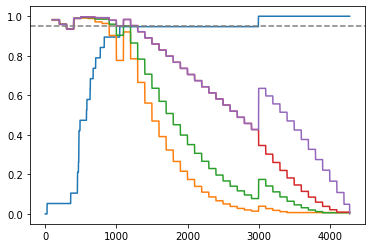

In [66]:
fig, ax = plt.subplots()
ax.plot(table['relevant'].cumsum()/table['relevant'].sum())
ax.plot(table['p_0.8'])
ax.plot(table['p_0.9'])
ax.plot(table['p_0.95'])
ax.plot(table['p_0.99'])
ax.axhline(0.95, color='grey', ls='--')

In [51]:
table.merge(pdf, left_on='screened_order', right_on='batch_sizes', how='left')

rec_id  screened_order  relevant  \
0     https://openalex.org/W2340708520             1.0         0   
1     https://openalex.org/W1965718591             2.0         0   
2     https://openalex.org/W2105215475             3.0         0   
3     https://openalex.org/W2323486441             4.0         0   
4     https://openalex.org/W2124479124             5.0         0   
...                                ...             ...       ...   
4275  https://openalex.org/W2549850175          4276.0         0   
4276  https://openalex.org/W2554191060          4277.0         0   
4277  https://openalex.org/W2021656917          4278.0         0   
4278  https://openalex.org/W2092534928          4279.0         0   
4279  https://openalex.org/W2029486004          4280.0         0   

      first_prediction  last_prediction review_id run_id  batch_sizes  p_0.8  
0                  NaN              NaN        25     39          NaN    NaN  
1                  NaN              NaN        25     39          NaN    NaN  
2                  NaN              NaN        25     39          NaN    NaN  
3                  NaN              NaN        25     39          NaN    NaN  
4                  NaN              NaN        25     39          NaN    NaN  
...                ...              ...       ...    ...          ...    ...  
4275          0.004685         0.000324        25     39          NaN    NaN  
4276          0.004447         0.000313        25     39          NaN    NaN  
4277          0.004084         0.000312        25     39          NaN    NaN  
4278          0.004968         0.000274        25     39          NaN    NaN  
4279          0.005069         0.000254        25     39          NaN    NaN  

[4280 rows x 9 columns]

In [47]:
pdf = pd.DataFrame(p)
pdf

batch_sizes         p
0             10  0.997664
1             20  0.995327
2             30  0.999060
3             40  0.996709
4             50  0.994358
..           ...       ...
380         3810  0.057176
381         3820  0.054891
382         3830  0.052648
383         3840  0.050446
384         3850  0.048285

[385 rows x 2 columns]

In [40]:
    llm_df['pred'] = llm_df['py'] - llm_df['pn']
    llm_df['alt_pred'] = llm_df['py'] + (1-llm_df['pn'])

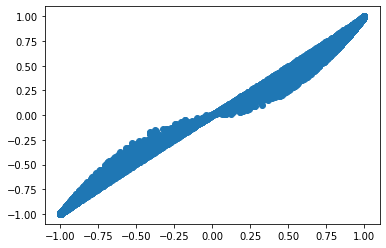

In [60]:
fig, ax = plt.subplots()

ax.scatter(llm_df['pred'], llm_df['alt_pred'])

Text(0, 0.5, 'P(yes)+(1-P(no))')

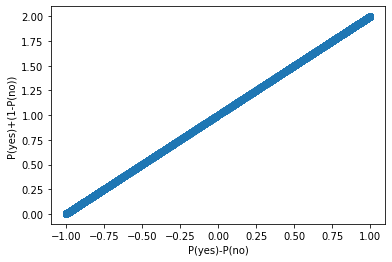

In [64]:
fig, ax = plt.subplots()

ax.scatter(llm_df['py']-llm_df['pn'], llm_df['py']+1-llm_df['pn'])

ax.set_xlabel('P(yes)-P(no)')
ax.set_ylabel('P(yes)+(1-P(no))')

Text(0, 0.5, '(P(yes)-(P(no))*(P(yes)+P(no))')

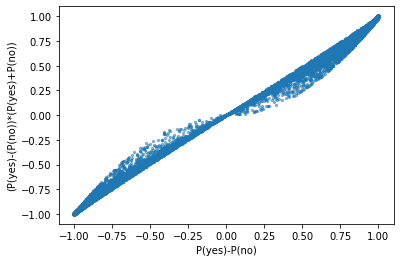

In [69]:
fig, ax = plt.subplots()

ax.scatter(
    llm_df['py']-llm_df['pn'], 
    (llm_df['py']-llm_df['pn'])*(llm_df['py']+llm_df['pn']),
    s=5, alpha=0.5
)

ax.set_xlabel('P(yes)-P(no)')
ax.set_ylabel('(P(yes)-(P(no))*(P(yes)+P(no))')

In [57]:
y = np.array([.4,.6])
n = np.array([.2,.4])
print(y-n)
print(y+1-n)
print((y-n)*(y+n))

[0.2 0.2]
[1.2 1.2]
[0.12 0.2 ]


In [55]:
(y-n)*(y+n)

array([0.12, 0.2 ])

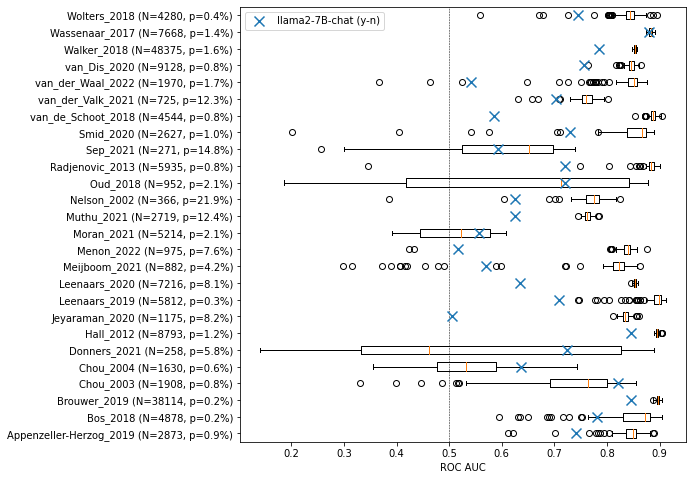

In [15]:
fig, ax = plt.subplots(figsize=(8,8))

ax.boxplot(svm_auc_scores, vert=False)
#llm_auc_scores
ax.set_yticklabels(reviews)
ax.scatter(
    llm_auc_scores, 
    np.arange(len(llm_auc_scores))+1,
    marker='x',
    s=100,
    zorder=50,
    label='llama2-7B-chat (y-n)'
)
# ax.scatter(
#     llm_alt_auc_scores, 
#     np.arange(len(llm_alt_auc_scores))+1,
#     marker='o',
#     s=100,
#     zorder=50,
#     color='none',
#     edgecolor='C1',
#     lw=2,
#     label='y + (1-n)'
# )
#sns.stripplot(svm_auc_scores, orient='h')
ax.legend()
ax.axvline(0.5, lw=0.5, ls='--', color='black')
ax.set_xlabel('ROC AUC')
plt.savefig('figures/llm_svm_roc.pdf', bbox_inches='tight')
plt.show()

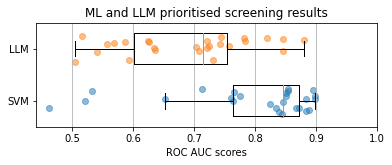

In [58]:
scaler = 1.5
fig, ax = plt.subplots(figsize=(3.7*scaler,1.6*scaler))
meds = [np.median(x) for x in svm_auc_scores]
ax.boxplot(
    [meds, llm_auc_scores],
    vert=False, widths=0.6, showfliers=False,
)
noise = (np.random.random(size=len(meds))-.5)/2
ax.scatter(
    meds, 1+noise,
    alpha=0.5
)

noise = (np.random.random(size=len(llm_auc_scores))-.5)/2
ax.scatter(
    llm_auc_scores, 2+noise,
    alpha=0.5
)
ax.set_yticklabels(['SVM','LLM'])

ax.set_xlabel('ROC AUC scores')
ax.set_title('ML and LLM prioritised screening results')
ax.grid(axis='x')
ax.set_xlim(xmax=1)

fig.tight_layout()

(array([1., 0., 1., 2., 2., 7., 5., 2., 2., 4.]),
 array([-0.26145405, -0.20242953, -0.14340501, -0.08438049, -0.02535598,
         0.03366854,  0.09269306,  0.15171757,  0.21074209,  0.26976661,
         0.32879113]),
 <BarContainer object of 10 artists>)

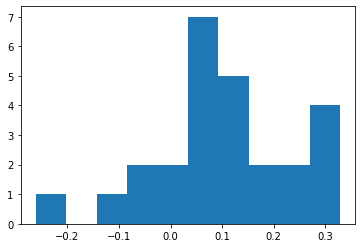

In [56]:
diff = np.array(meds) - np.array(llm_auc_scores) 

plt.hist(diff)

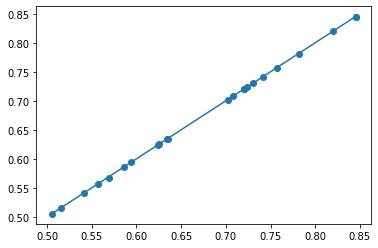

In [70]:
fig, ax = plt.subplots()

ax.scatter(llm_auc_scores, llm_alt_auc_scores)
mi, ma = min(llm_auc_scores), max(llm_auc_scores)

ax.plot([mi,ma], [mi,ma])

In [84]:
diff = (np.array(llm_alt_auc_scores) - np.array(llm_auc_scores)).mean()
sd = (np.array(llm_alt_auc_scores) - np.array(llm_auc_scores)).std()
f'{diff:.2%} ({sd:.2%})'

'-0.06% (0.07%)'

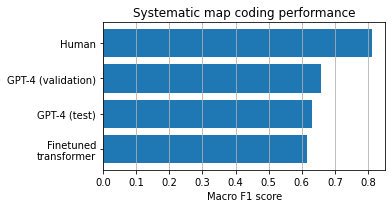

In [46]:
fig, ax = plt.subplots(figsize=(3.7*scaler,2*scaler))

ax.barh([0,1,2,3],[0.617,0.6296,0.6588,0.8116])
ax.grid(axis='x')
ax.set_yticks([0,1,2,3])
ax.set_yticklabels(['Finetuned\ntransformer','GPT-4 (test)','GPT-4 (validation)','Human'])
ax.set_xlabel('Macro F1 score')
ax.set_title('Systematic map coding performance')

fig.tight_layout()


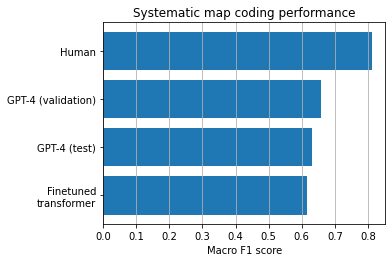

In [48]:
fig, ax = plt.subplots(figsize=(3.7*scaler,2.5*scaler))

ax.barh([0,1,2,3],[0.617,0.6296,0.6588,0.8116])
ax.grid(axis='x')
ax.set_yticks([0,1,2,3])
ax.set_yticklabels(['Finetuned\ntransformer','GPT-4 (test)','GPT-4 (validation)','Human'])
ax.set_xlabel('Macro F1 score')
ax.set_title('Systematic map coding performance')

fig.tight_layout()
plt.savefig('figures/LLM-coding.pdf',bbox_inches='tight')